# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly import tools
from plotly.offline import iplot
import ydata_profiling as pp
import plotly.express as px
import statsmodels.api as sm
import scipy.stats as stats
from ydata_profiling import ProfileReport

from sklearn.preprocessing import LabelEncoder

# Machine Learning Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# Machine Learning Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_curve, auc, roc_auc_score


# Model Deployment
import pickle

import warnings
warnings.filterwarnings('ignore')

# Import the Dataset

In [2]:
df_emp_performance = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xlsx', sheet_name='INX_Future_Inc_Employee_Perform')

In [3]:
df_emp_performance.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

# Exploratory Data Analysis

In [4]:
df_emp_performance.shape

(1200, 28)

In [5]:
df_emp_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
df_emp_performance.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [7]:
df_emp_performance= df_emp_performance.drop('EmpNumber',axis=1)
df_emp_performance.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...   
2                  4                           4  ...   
3                  4                           2  ...   
4                  4                           1  ...   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

  ExperienceYearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                            7                        0                     8   
1                            7                        1                     7   
2                           13                        1                    12   
3                            6                       12                     6   
4                            2                        2                     2   

   Attrition  PerformanceRating  
0         No                  3  
1         No                  3  
2         No                  4  
3         No                  3  
4         No                  3  

[5 rows x 27 columns]

In [8]:
df_emp_performance.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

In [9]:
df_emp_performance.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [10]:
df_emp_performance.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [11]:
df_emp_performance.duplicated().sum()

0

In [12]:
distinct_values = []
for i in df_emp_performance.columns:
    x = df_emp_performance[i].value_counts().count()
    distinct_values.append(x)
    
pd.DataFrame(distinct_values, index = df_emp_performance.columns, columns = ["Total Distinct Values"])

Total Distinct Values
Age                                              43
Gender                                            2
EducationBackground                               6
MaritalStatus                                     3
EmpDepartment                                     6
EmpJobRole                                       19
BusinessTravelFrequency                           3
DistanceFromHome                                 29
EmpEducationLevel                                 5
EmpEnvironmentSatisfaction                        4
EmpHourlyRate                                    71
EmpJobInvolvement                                 4
EmpJobLevel                                       5
EmpJobSatisfaction                                4
NumCompaniesWorked                               10
OverTime                                          2
EmpLastSalaryHikePercent                         15
EmpRelationshipSatisfaction                       4
TotalWorkExperienceInYears                       40
TrainingTimesLastYear                             7
EmpWorkLifeBalance                                4
ExperienceYearsAtThisCompany                     37
ExperienceYearsInCurrentRole                     19
YearsSinceLastPromotion                          16
YearsWithCurrManager                             18
Attrition                                         2
PerformanceRating                                 3

In [13]:
numerical_cols= df_emp_performance._get_numeric_data().columns
cols= df_emp_performance.columns
categorical_cols=list(set(cols)-set(numerical_cols))

In [14]:
numerical_cols

Index(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [15]:
categorical_cols

['MaritalStatus',
 'EducationBackground',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition',
 'Gender',
 'EmpDepartment',
 'EmpJobRole']

In [16]:
df_emp_performance['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

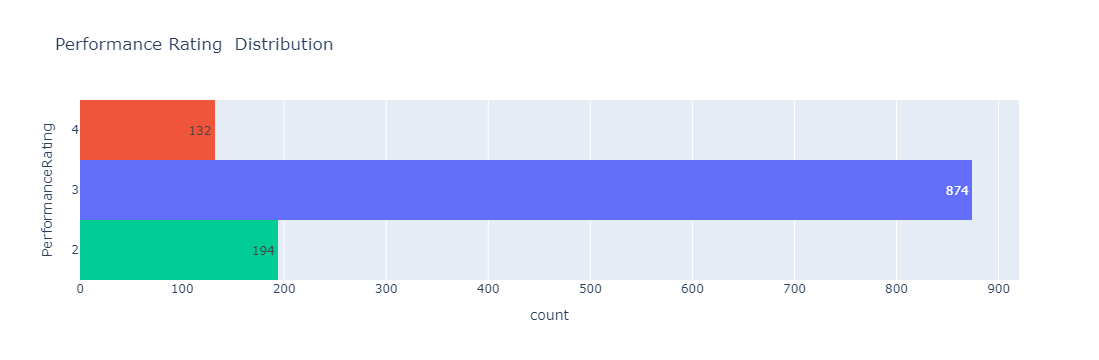

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [17]:
class_dis = px.histogram(
    data_frame = df_emp_performance,
    y = 'PerformanceRating',
    color = 'PerformanceRating',
    title = 'Performance Rating  Distribution',
    text_auto=True
    )
class_dis.update_layout(showlegend=False)
class_dis.show()
df_emp_performance['PerformanceRating'].value_counts()

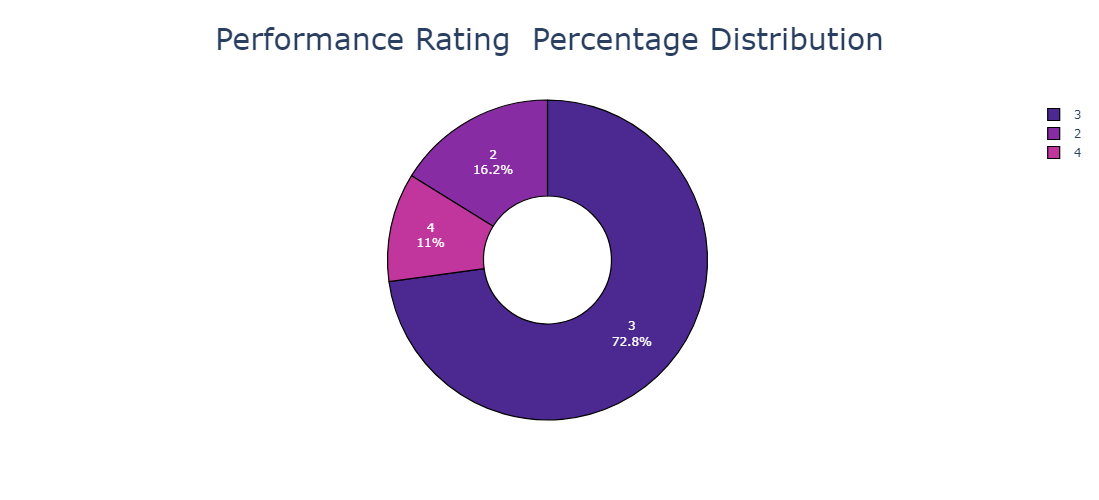

In [18]:
fig = px.pie(data_frame = df_emp_performance, names = 'PerformanceRating', hole = 0.4, title = 'Performance Rating  Percentage Distribution',
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Agsunset)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

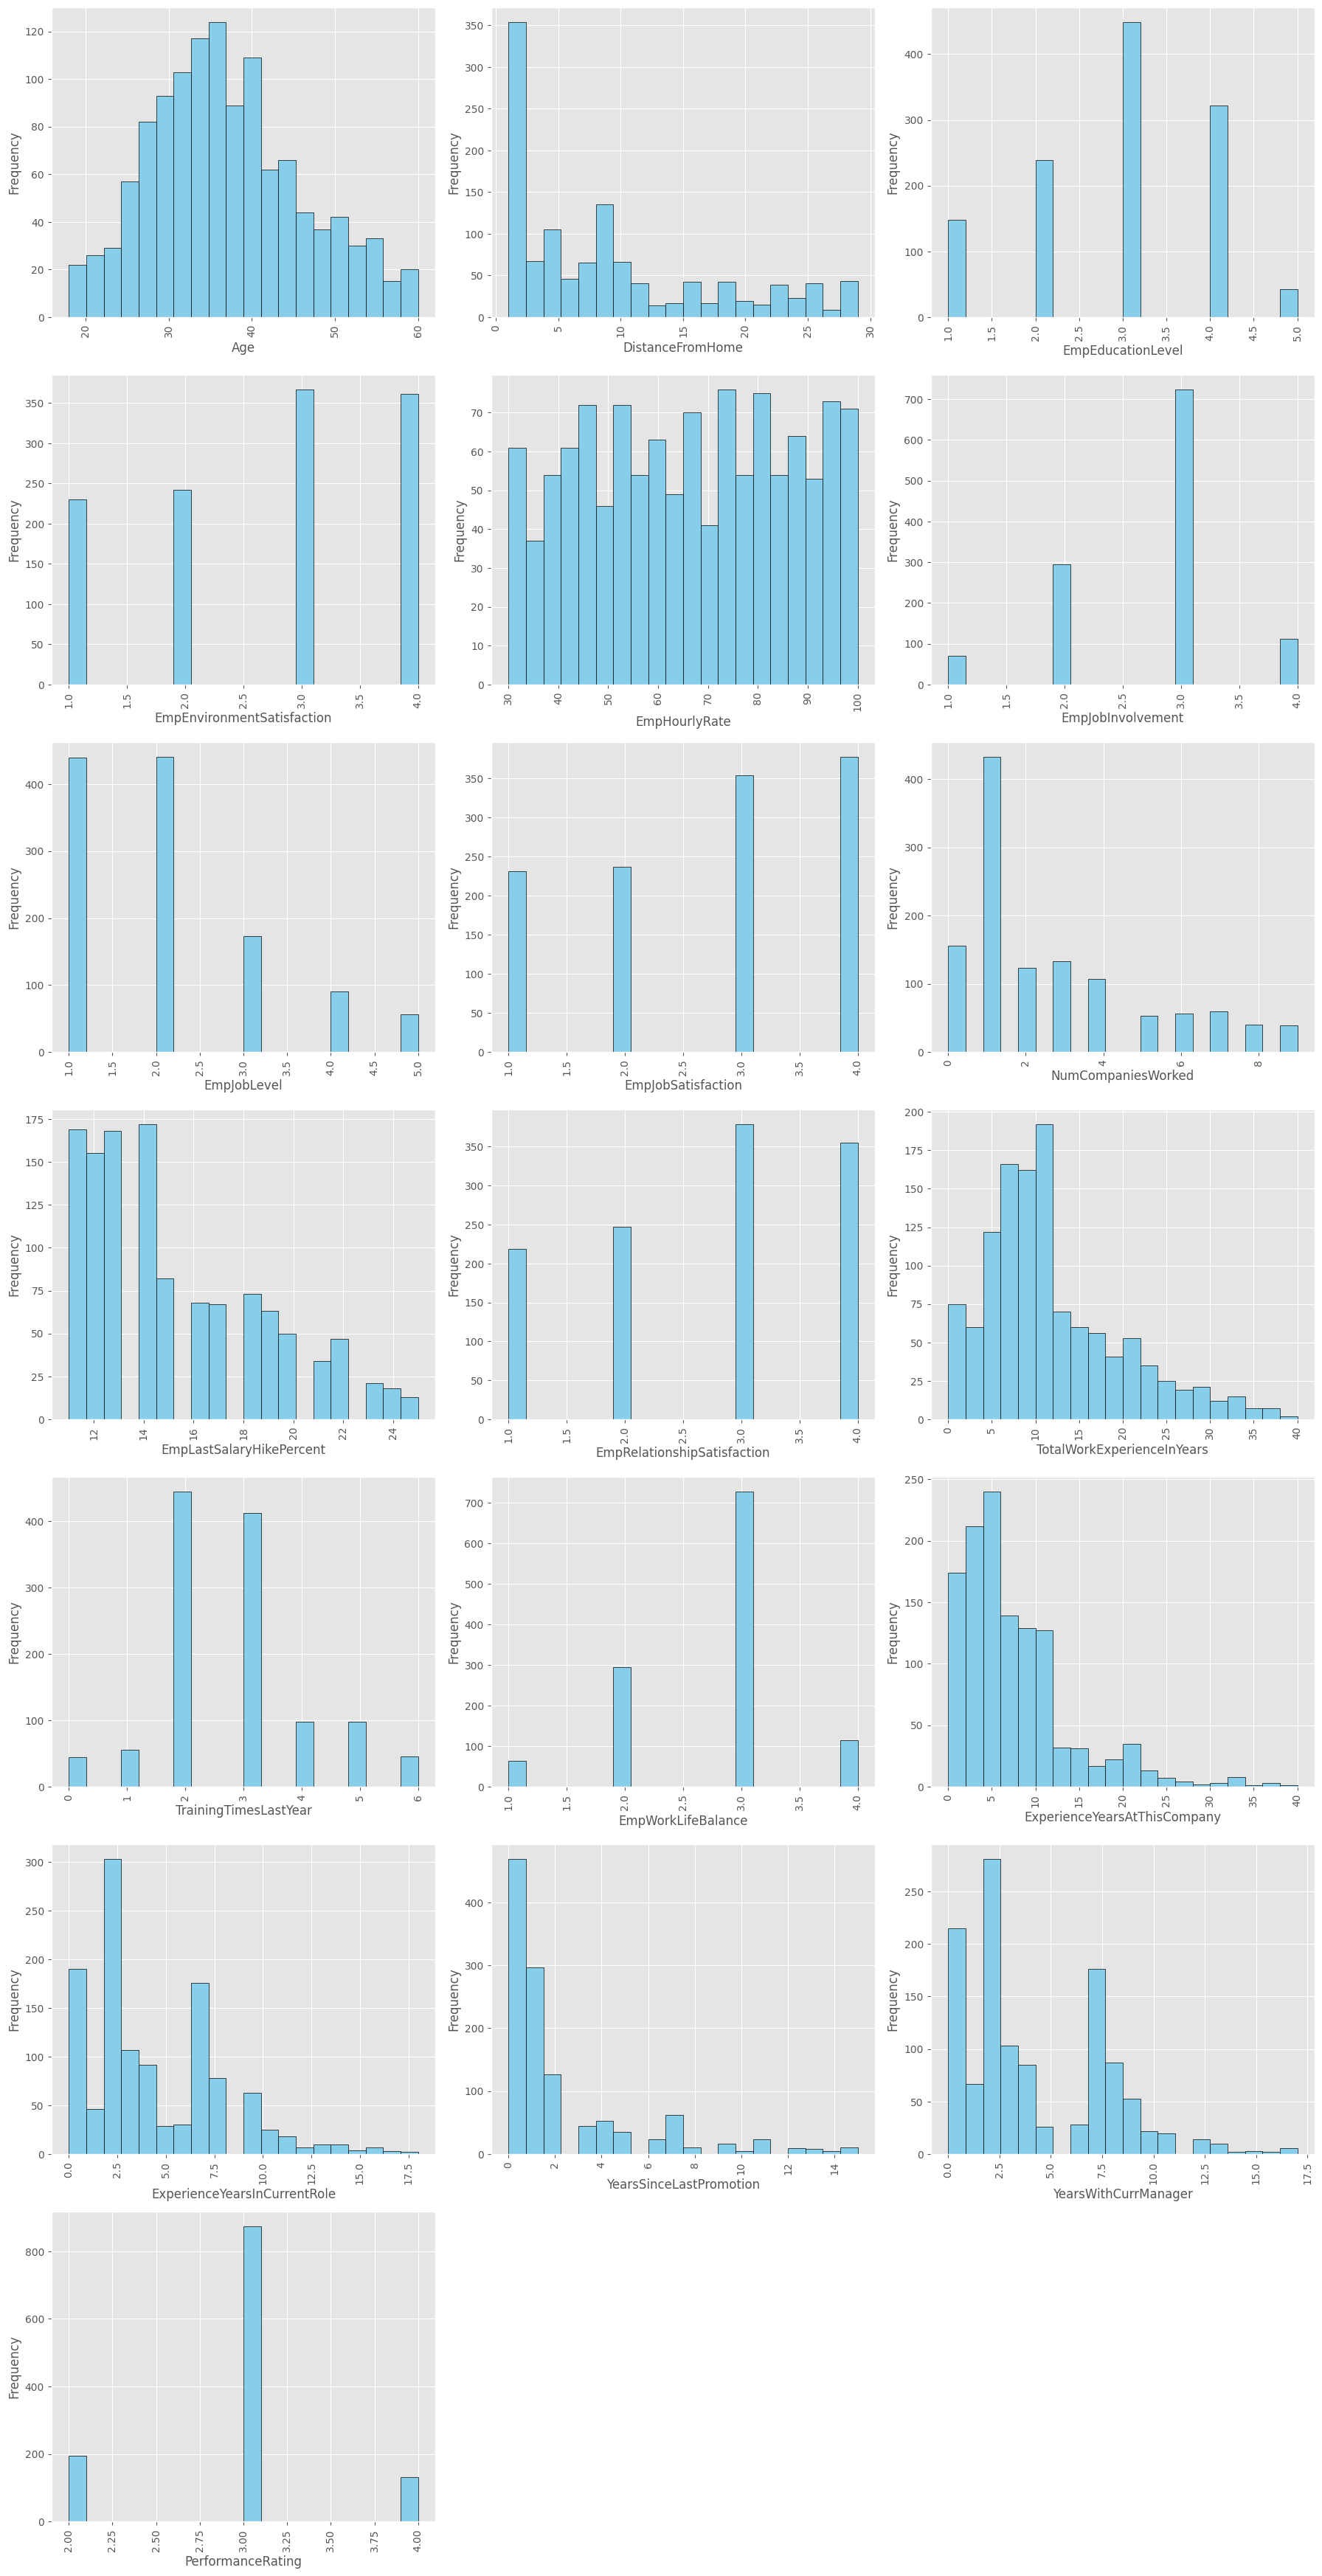

In [19]:
plt.style.use('ggplot')
num_plots = len(numerical_cols)
cols = 3  # Number of columns in subplot grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows needed

plt.figure(figsize=(cols * 6, rows * 5))  # Adjust figure size as needed

for index,column in enumerate(df_emp_performance[numerical_cols]):
    plt.subplot(rows,cols,index+1)
    plt.hist(df_emp_performance[column], bins=20, color='skyblue', edgecolor='black')
    plt.xticks(rotation = 90)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout(pad = 1.0)
plt.show()

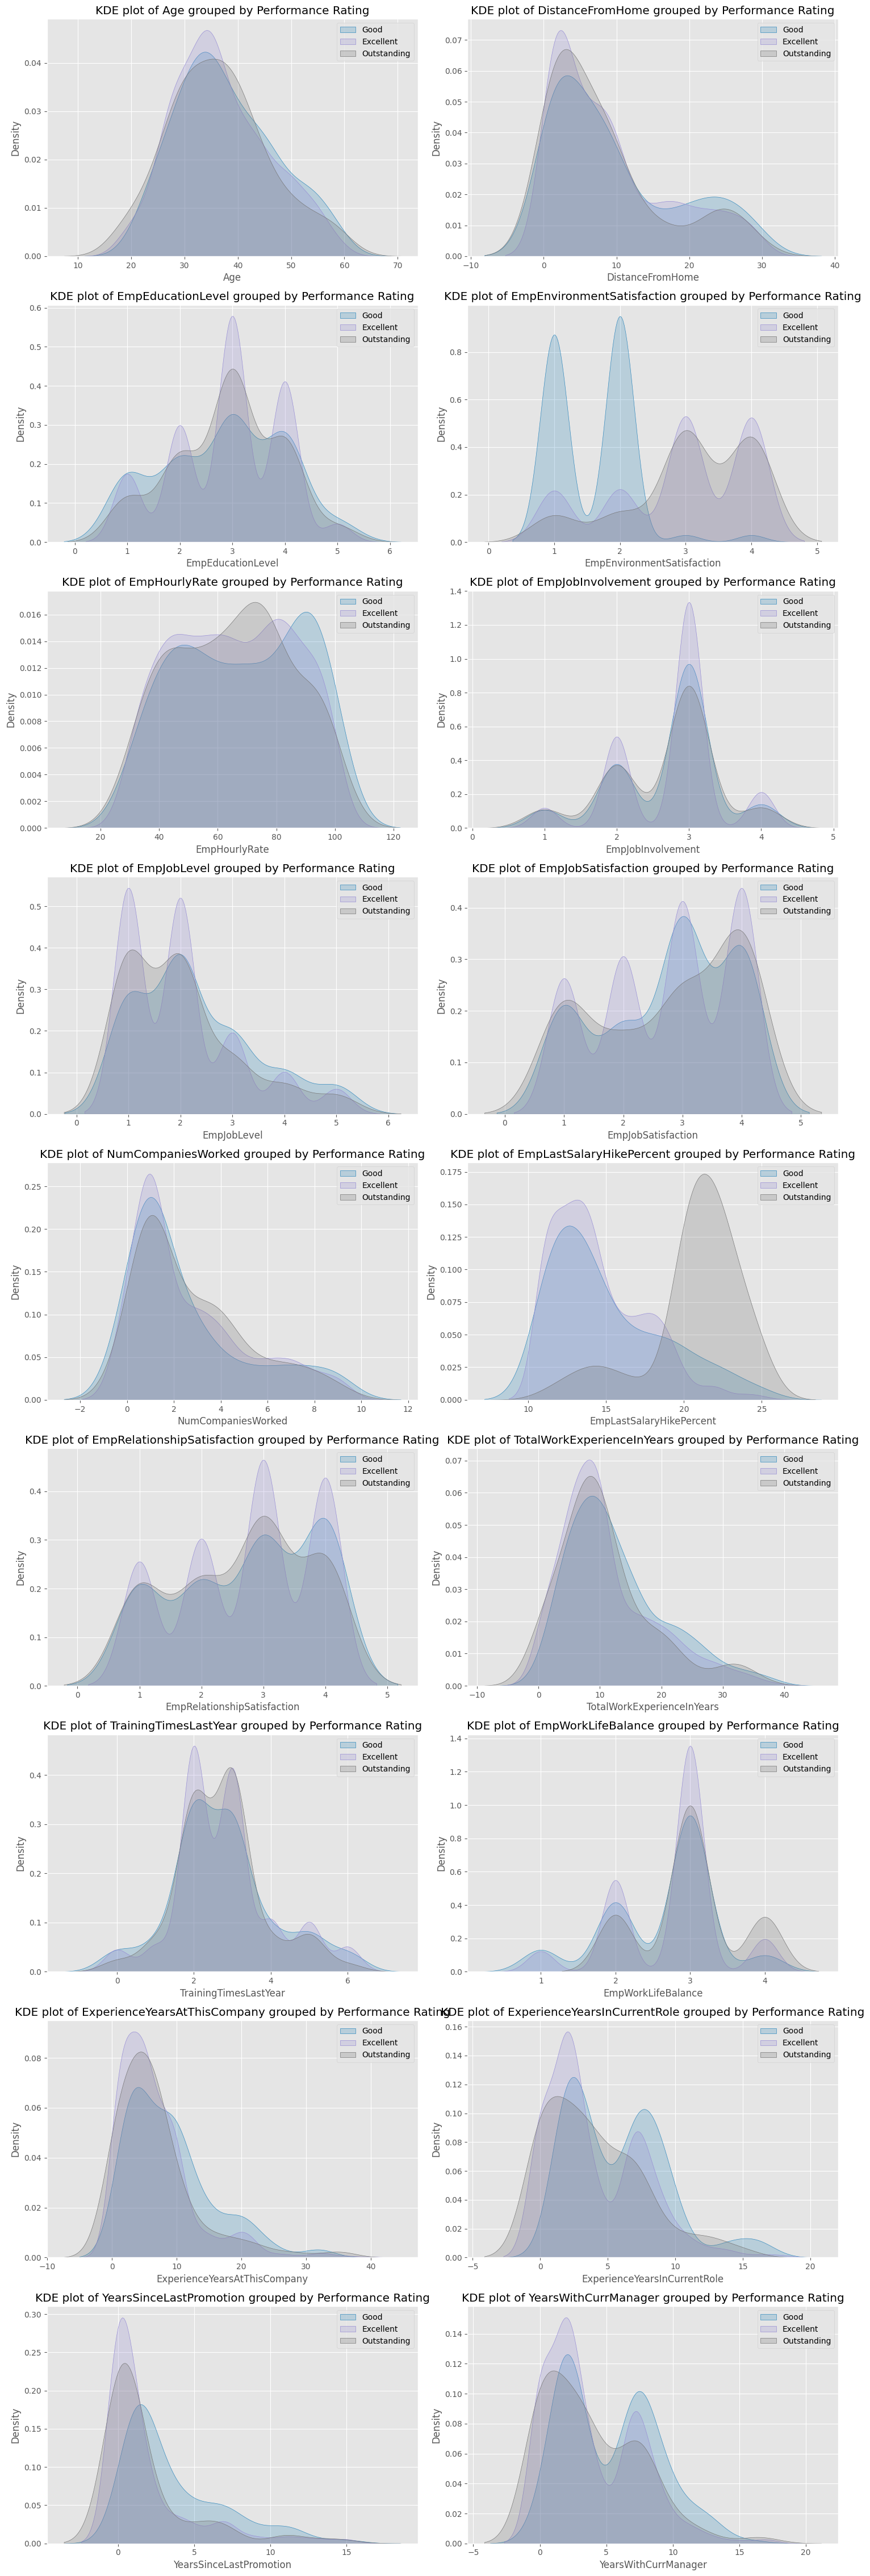

In [20]:
label_map = {'Low': 1, 'Good': 2, 'Excellent': 3, 'Outstanding': 4}
num_columns = len(df_emp_performance[numerical_cols].columns)
num_rows = (num_columns + 1) // 2
numerical_columns = ['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

plt.figure(figsize=(15, 5*num_rows))
for i, column in enumerate(df_emp_performance[numerical_columns]):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 1][column], label='Low', fill=True)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 2][column], label='Good', fill=True)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 3][column], label='Excellent', fill=True)
    sns.kdeplot(data=df_emp_performance[df_emp_performance['PerformanceRating'] == 4][column], label='Outstanding', fill=True)
    plt.title(f'KDE plot of {column} grouped by Performance Rating')
    plt.legend()

plt.tight_layout()
plt.show()

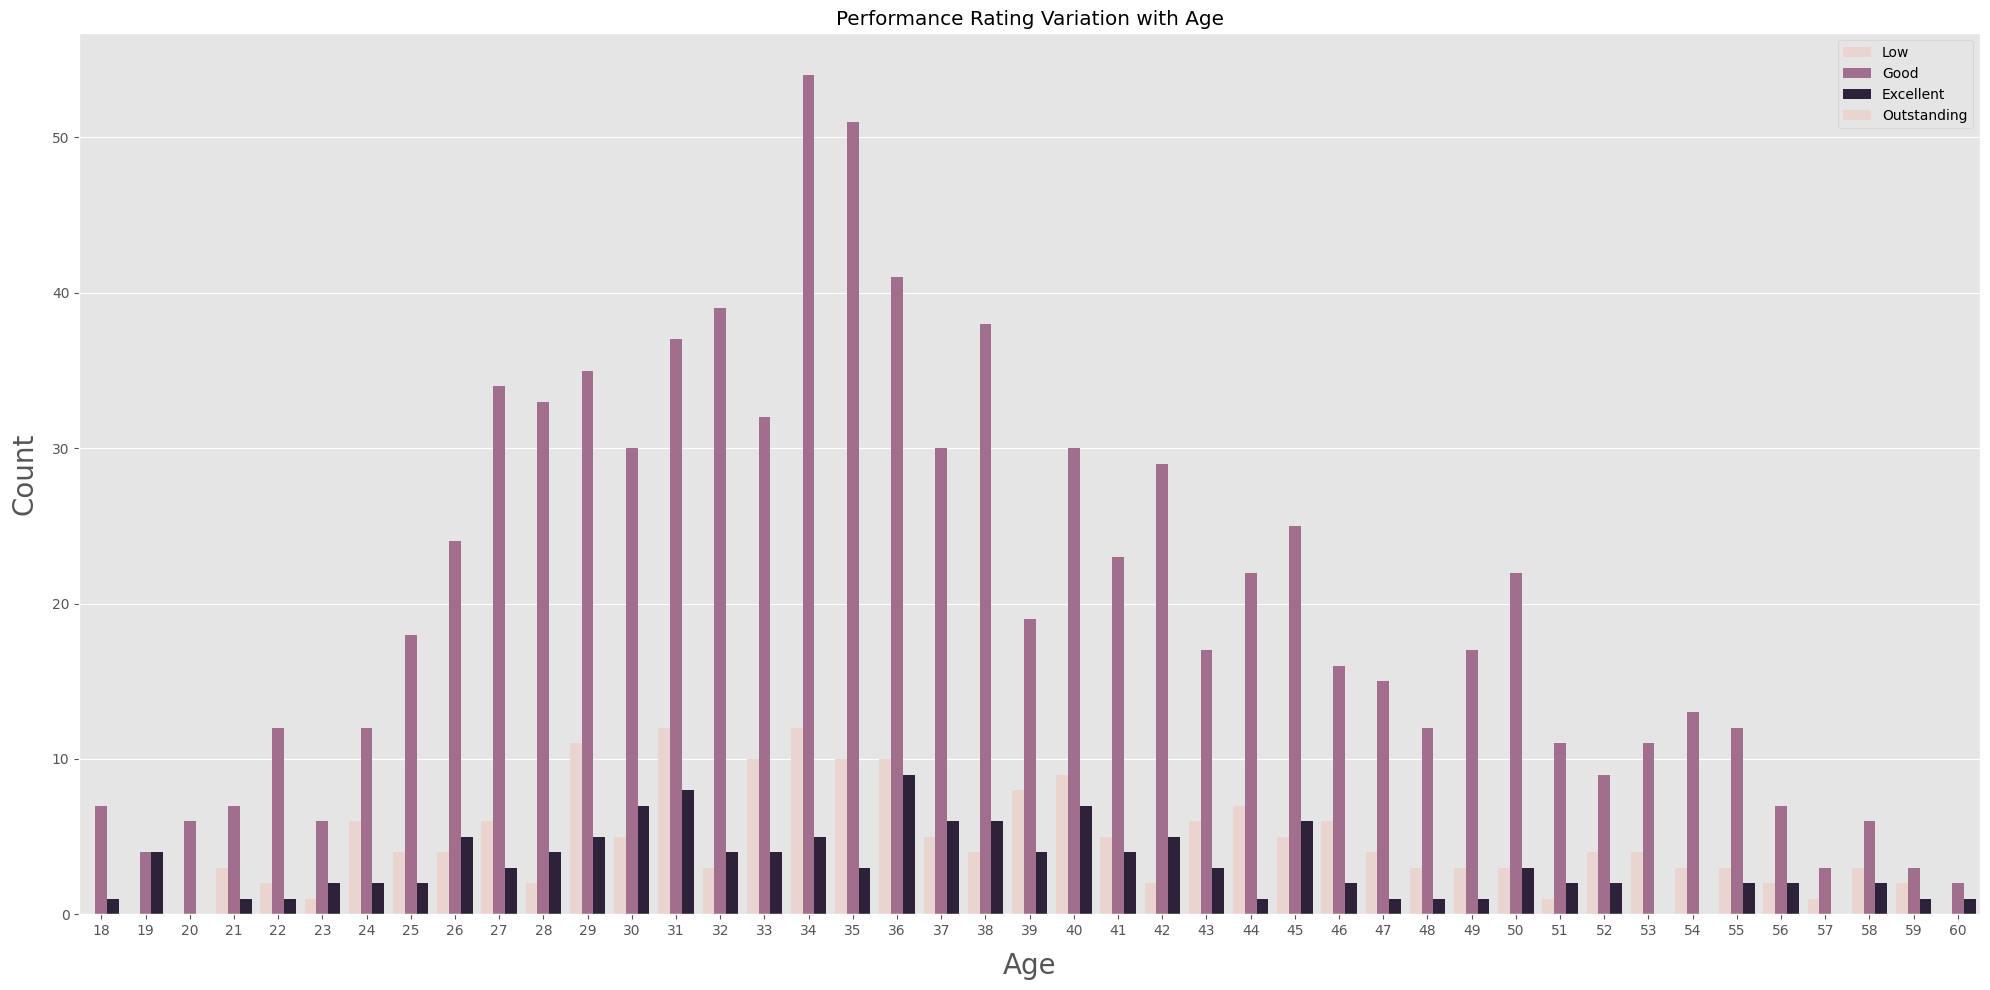

In [21]:
# Age vs Performance Rating Countplot
label_map = {'Low': 1, 'Good': 2, 'Excellent': 3, 'Outstanding': 4}
plt.figure(figsize=(20,10))
sns.countplot(data=df_emp_performance, x='Age',hue='PerformanceRating')
plt.title('Performance Rating Variation with Age')
plt.xlabel("Age",labelpad=10,fontsize=20)
plt.ylabel("Count",labelpad=10,fontsize=20)
plt.legend(label_map)
plt.tight_layout()

# Department wise Performance Rating Analysis

In [22]:
# Dataframe to  analyze department-wise performance
dept_df = df_emp_performance.iloc[:,[4,26]].copy()
dept_performance_df = dept_df.copy()

In [23]:
dept_performance_df.head()

EmpDepartment  PerformanceRating
0            Sales                  3
1            Sales                  3
2            Sales                  4
3  Human Resources                  3
4            Sales                  3

In [24]:
# Department Mean performance
dept_performance_df.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

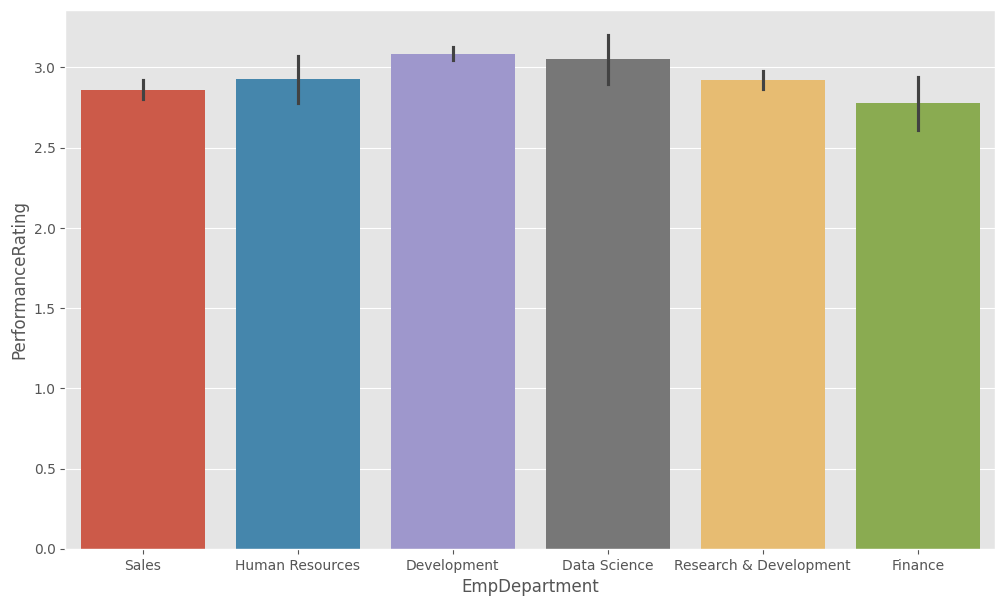

In [25]:
plt.figure(figsize=(12,7))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_performance_df, hue='EmpDepartment')

In [26]:
# Analyze each department separately
dept_performance_df.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [27]:
# Creating a new dataframe to analyze each department separately
df_department = pd.get_dummies(dept_performance_df['EmpDepartment'])
df_performance = pd.DataFrame(dept_performance_df['PerformanceRating'])
df_dept_rating = pd.concat([df_department,df_performance],axis=1)

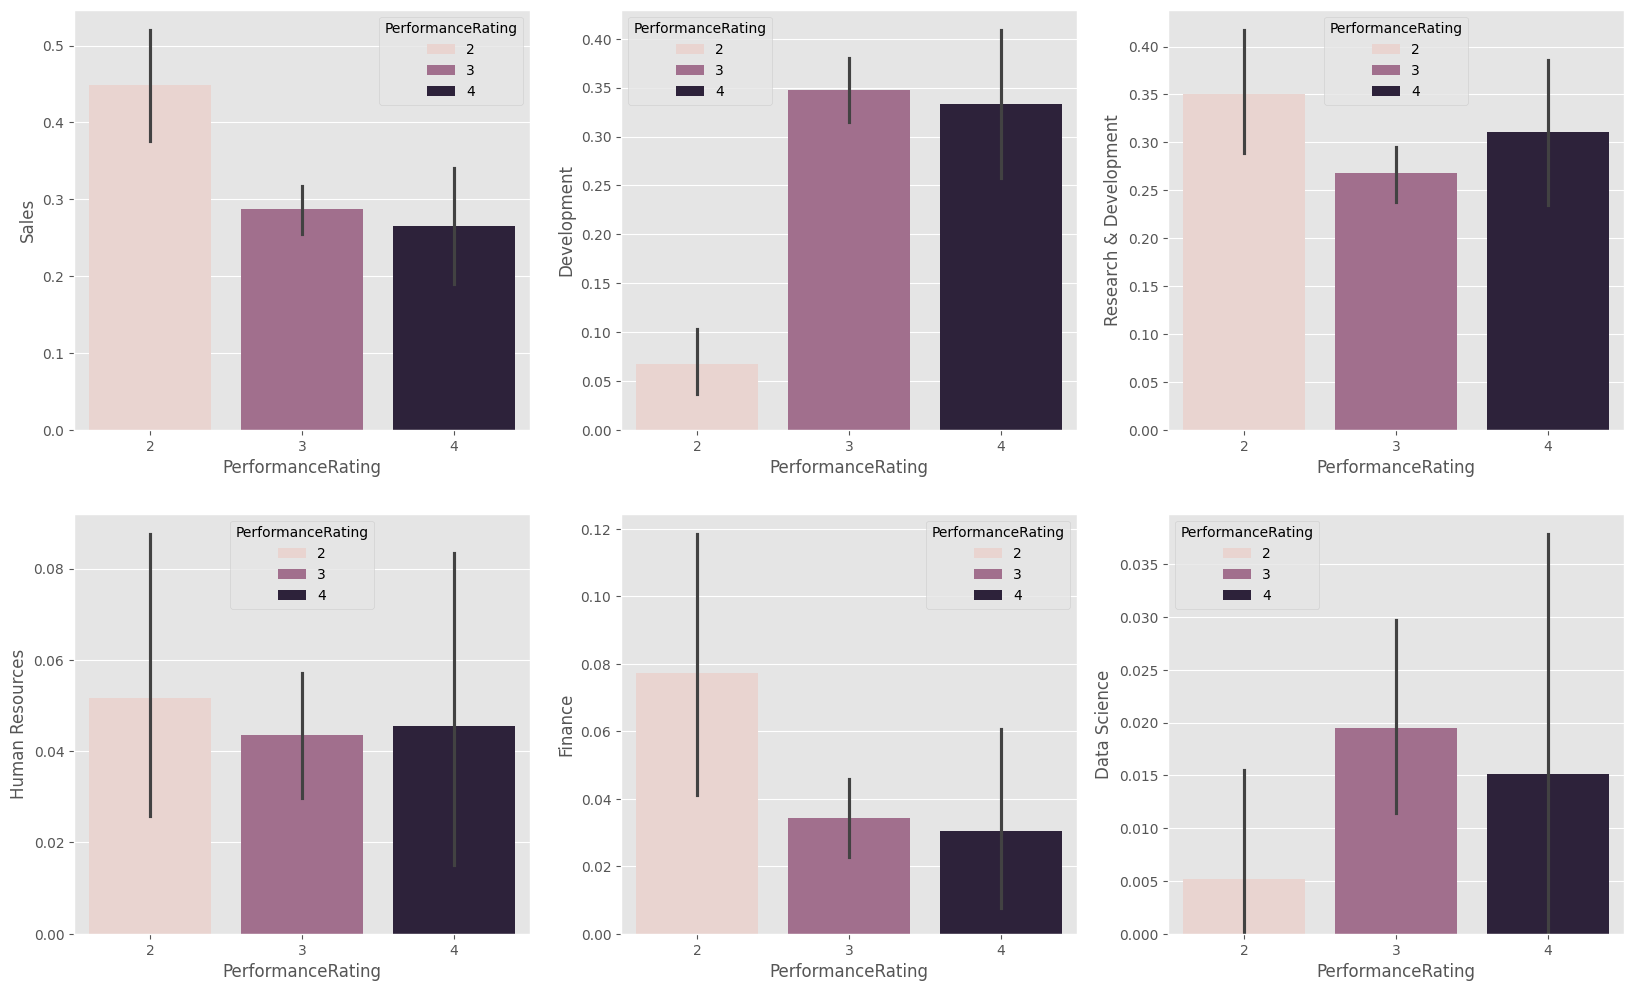

In [28]:
# Plotting Separate bar graphs for each department performance
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='PerformanceRating', y='Sales', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,2)
sns.barplot(x='PerformanceRating', y='Development', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,3)
sns.barplot(x='PerformanceRating', y='Research & Development', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,4)
sns.barplot(x='PerformanceRating', y='Human Resources', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,5)
sns.barplot(x='PerformanceRating', y='Finance', data=df_dept_rating, hue='PerformanceRating')
plt.subplot(2,3,6)
sns.barplot(x='PerformanceRating', y='Data Science', data=df_dept_rating, hue='PerformanceRating')
plt.show()

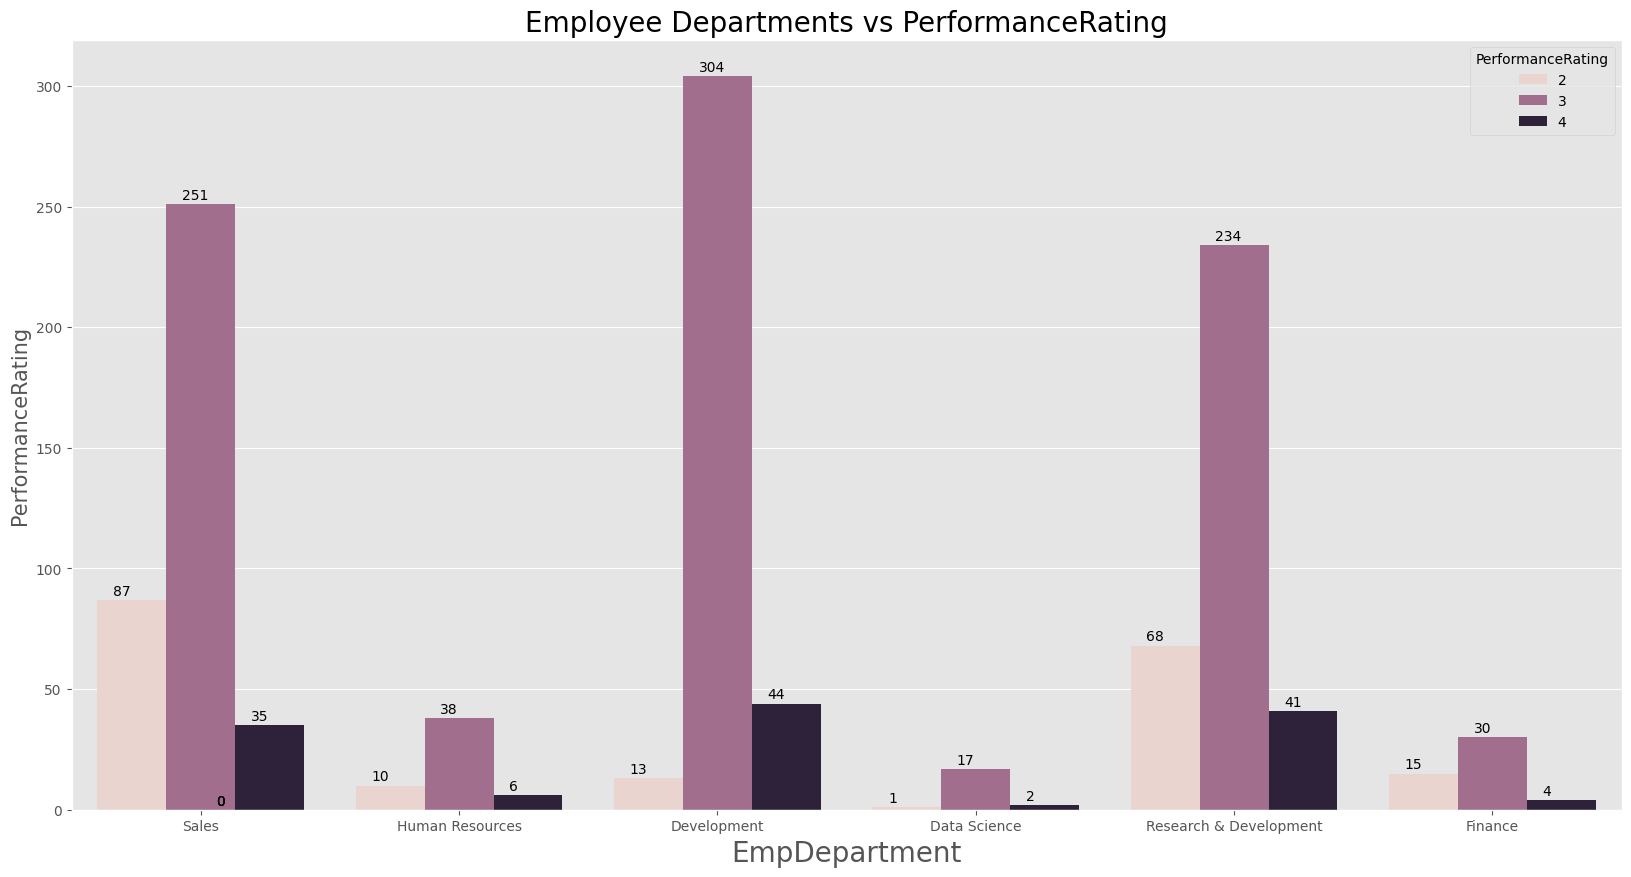

In [29]:
plt.figure(figsize=(20,10),facecolor='white')
ax = sns.countplot(x='EmpDepartment',hue=df_emp_performance.PerformanceRating,data=df_emp_performance)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.06, i.get_height()+2))
plt.title('Employee Departments vs PerformanceRating',fontsize=20)
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

In [30]:
# Comparing numerical features with Performance Rating

low = df_emp_performance[df_emp_performance['PerformanceRating'] == 1]
good = df_emp_performance[df_emp_performance['PerformanceRating'] == 2]
excellent = df_emp_performance[df_emp_performance['PerformanceRating'] == 3]
outstanding = df_emp_performance[df_emp_performance['PerformanceRating'] == 4]

# Calculating mean values for numerical columns
numerical_columns = ['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

df_comparison = pd.DataFrame({
    'Metric': numerical_columns,
    'Mean with Low Performance Rating': low[numerical_columns].mean(),
    'Mean with Good Performance Rating': good[numerical_columns].mean(),
    'Mean with Excellent Performance Rating': excellent[numerical_columns].mean(),
    'Mean with Outstanding Performance Rating': outstanding[numerical_columns].mean()
})

df_comparison

Metric  \
Age                                                    Age   
DistanceFromHome                          DistanceFromHome   
EmpEducationLevel                        EmpEducationLevel   
EmpEnvironmentSatisfaction      EmpEnvironmentSatisfaction   
EmpHourlyRate                                EmpHourlyRate   
EmpJobInvolvement                        EmpJobInvolvement   
EmpJobLevel                                    EmpJobLevel   
EmpJobSatisfaction                      EmpJobSatisfaction   
NumCompaniesWorked                      NumCompaniesWorked   
EmpLastSalaryHikePercent          EmpLastSalaryHikePercent   
EmpRelationshipSatisfaction    EmpRelationshipSatisfaction   
TotalWorkExperienceInYears      TotalWorkExperienceInYears   
TrainingTimesLastYear                TrainingTimesLastYear   
EmpWorkLifeBalance                      EmpWorkLifeBalance   
ExperienceYearsAtThisCompany  ExperienceYearsAtThisCompany   
ExperienceYearsInCurrentRole  ExperienceYearsInCurrentRole   
YearsSinceLastPromotion            YearsSinceLastPromotion   
YearsWithCurrManager                  YearsWithCurrManager   

                              Mean with Low Performance Rating  \
Age                                                        NaN   
DistanceFromHome                                           NaN   
EmpEducationLevel                                          NaN   
EmpEnvironmentSatisfaction                                 NaN   
EmpHourlyRate                                              NaN   
EmpJobInvolvement                                          NaN   
EmpJobLevel                                                NaN   
EmpJobSatisfaction                                         NaN   
NumCompaniesWorked                                         NaN   
EmpLastSalaryHikePercent                                   NaN   
EmpRelationshipSatisfaction                                NaN   
TotalWorkExperienceInYears                                 NaN   
TrainingTimesLastYear                                      NaN   
EmpWorkLifeBalance                                         NaN   
ExperienceYearsAtThisCompany                               NaN   
ExperienceYearsInCurrentRole                               NaN   
YearsSinceLastPromotion                                    NaN   
YearsWithCurrManager                                       NaN   

                              Mean with Good Performance Rating  \
Age                                                   37.804124   
DistanceFromHome                                       9.835052   
EmpEducationLevel                                      2.829897   
EmpEnvironmentSatisfaction                             1.582474   
EmpHourlyRate                                         68.216495   
EmpJobInvolvement                                      2.716495   
EmpJobLevel                                            2.304124   
EmpJobSatisfaction                                     2.752577   
NumCompaniesWorked                                     2.572165   
EmpLastSalaryHikePercent                              15.072165   
EmpRelationshipSatisfaction                            2.737113   
TotalWorkExperienceInYears                            12.752577   
TrainingTimesLastYear                                  2.757732   
EmpWorkLifeBalance                                     2.634021   
ExperienceYearsAtThisCompany                           9.097938   
ExperienceYearsInCurrentRole                           5.788660   
YearsSinceLastPromotion                                3.695876   
YearsWithCurrManager                                   5.350515   

                              Mean with Excellent Performance Rating  \
Age                                                        36.784897   
DistanceFromHome                                            9.137300   
EmpEducationLevel                                           2.905034   
EmpEnvironmentSatisfaction                              

In [31]:
df_emp_performance[numerical_columns].corr()

Age  DistanceFromHome  EmpEducationLevel  \
Age                           1.000000          0.020937           0.207313   
DistanceFromHome              0.020937          1.000000           0.045856   
EmpEducationLevel             0.207313          0.045856           1.000000   
EmpEnvironmentSatisfaction    0.013814         -0.017719          -0.037103   
EmpHourlyRate                 0.062867          0.013730           0.014095   
EmpJobInvolvement             0.027216          0.003231           0.027544   
EmpJobLevel                   0.509139          0.017270           0.100734   
EmpJobSatisfaction           -0.002436         -0.003036           0.000357   
NumCompaniesWorked            0.284408         -0.021411           0.128674   
EmpLastSalaryHikePercent     -0.006105          0.044974           0.002358   
EmpRelationshipSatisfaction   0.049749         -0.009509          -0.016690   
TotalWorkExperienceInYears    0.680886          0.027306           0.151062   
TrainingTimesLastYear        -0.016053         -0.032082          -0.013674   
EmpWorkLifeBalance           -0.019563         -0.044788           0.010276   
ExperienceYearsAtThisCompany  0.318852          0.021908           0.076332   
ExperienceYearsInCurrentRole  0.217163          0.019898           0.066672   
YearsSinceLastPromotion       0.228199          0.013246           0.054313   
YearsWithCurrManager          0.205098          0.017860           0.088988   

                              EmpEnvironmentSatisfaction  EmpHourlyRate  \
Age                                             0.013814       0.062867   
DistanceFromHome                               -0.017719       0.013730   
EmpEducationLevel                              -0.037103       0.014095   
EmpEnvironmentSatisfaction                      1.000000      -0.049501   
EmpHourlyRate                                  -0.049501       1.000000   
EmpJobInvolvement                               0.004865       0.054741   
EmpJobLevel                                    -0.008272      -0.018606   
EmpJobSatisfaction                             -0.004319      -0.066417   
NumCompaniesWorked                              0.017270       0.040484   
EmpLastSalaryHikePercent                       -0.047271      -0.015934   
EmpRelationshipSatisfaction                    -0.010504       0.008783   
TotalWorkExperienceInYears                     -0.012894       0.026034   
TrainingTimesLastYear                           0.001192      -0.024160   
EmpWorkLifeBalance                             -0.000262       0.016189   
ExperienceYearsAtThisCompany                   -0.000561      -0.000399   
ExperienceYearsInCurrentRole                    0.025491      -0.011871   
YearsSinceLastPromotion                         0.010732      -0.010000   
YearsWithCurrManager                           -0.011702      -0.004576   

                              EmpJobInvolvement  EmpJobLevel  \
Age                                    0.027216     0.509139   
DistanceFromHome                       0.003231     0.017270   
EmpEducationLevel                      0.027544     0.100734   
EmpEnvironmentSatisfaction             0.004865    -0.008272   
EmpHourlyRate                          0.054741    -0.018606   
EmpJobInvolvement                      1.000000    -0.034349   
EmpJobLevel                           -0.034349     1.000000   
EmpJobSatisfaction                    -0.005501    -0.011853   
NumCompaniesWorked                     0.018211     0.127477   
EmpLastSalaryHikePercent              -0.001742    -0.020975   
EmpRelationshipSatisfaction            0.018037     0.002992   
TotalWorkExperienceInYears            -0.028851     0.784229   
TrainingTimesLastYear                 -0.025168    -0.000389   
EmpWorkLifeBalance                    -0.014129     0.049218   
ExperienceYearsAtThisCompany          -0.039720     0.540377   
ExperienceYearsInCurrentRole           0.002910     0.399235   
YearsSinceLastPromo

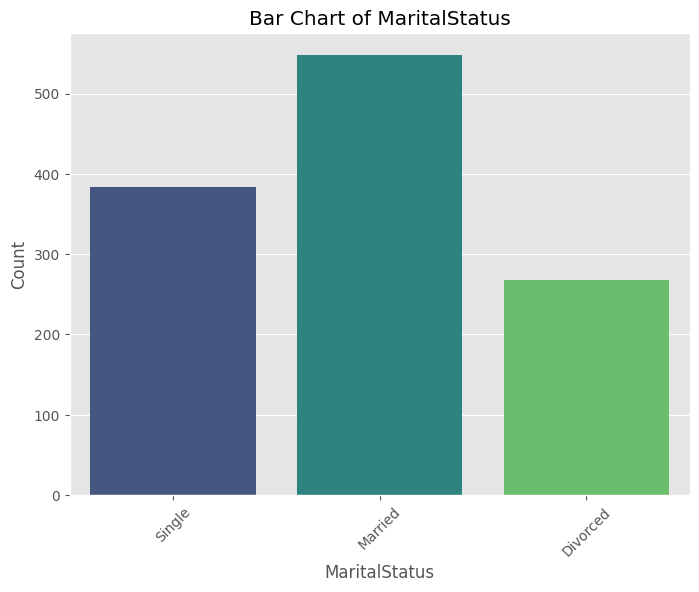

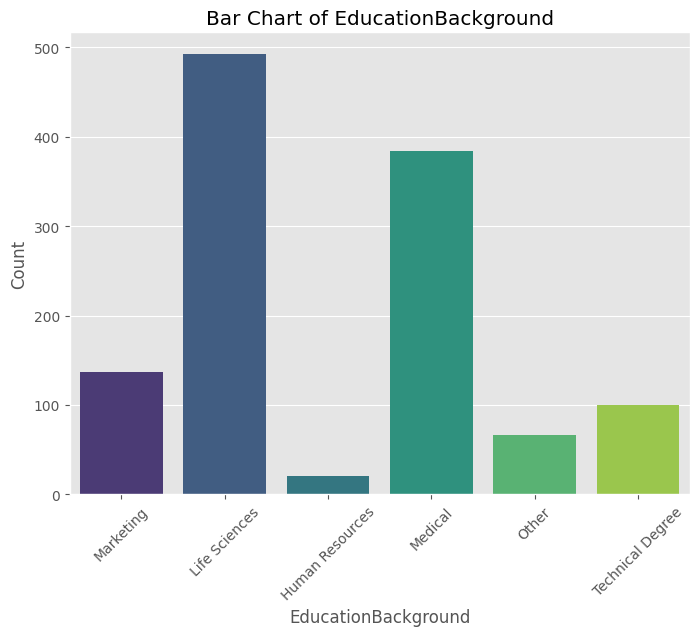

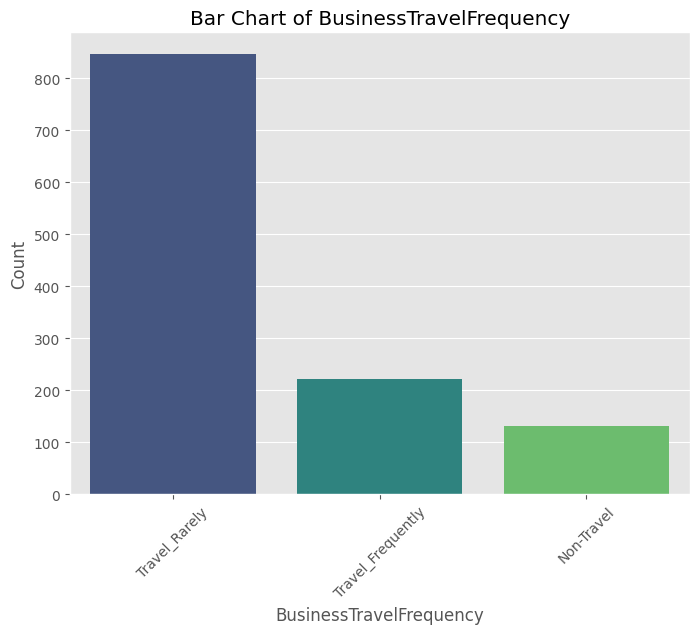

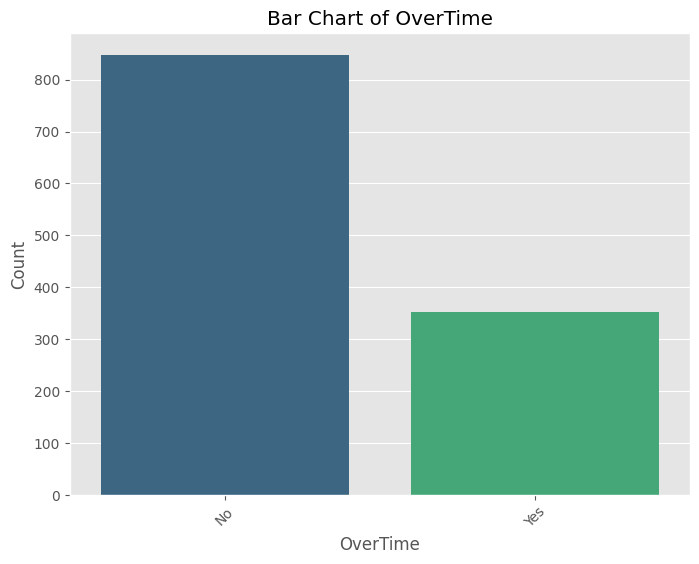

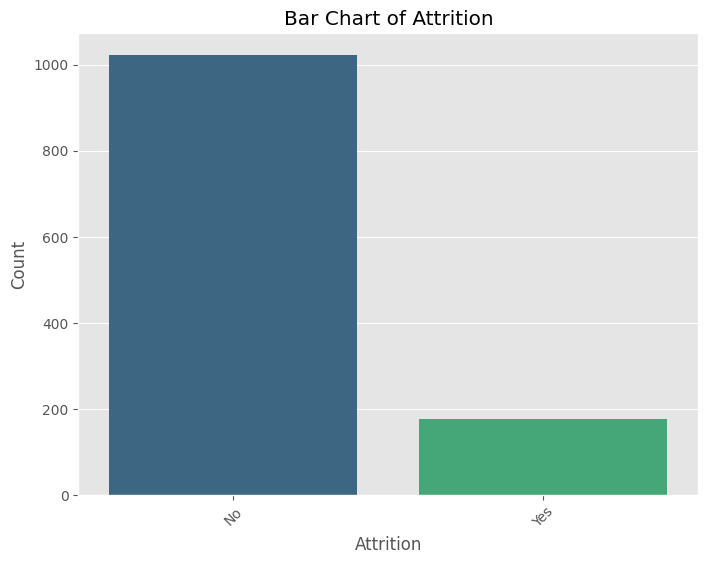

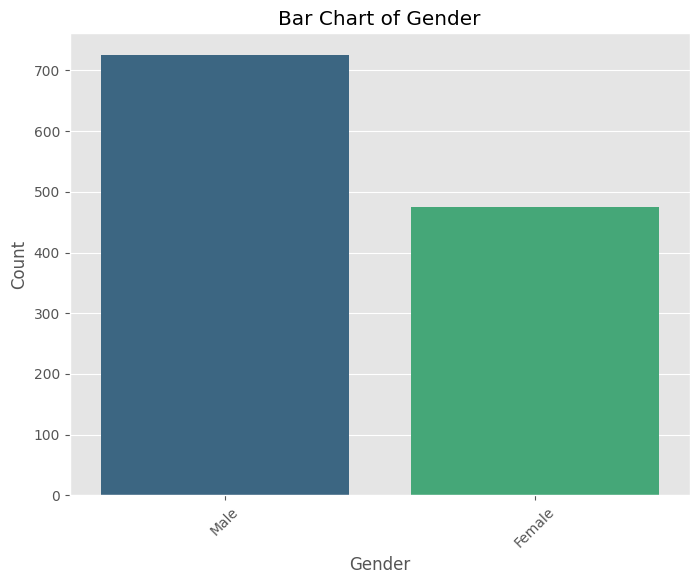

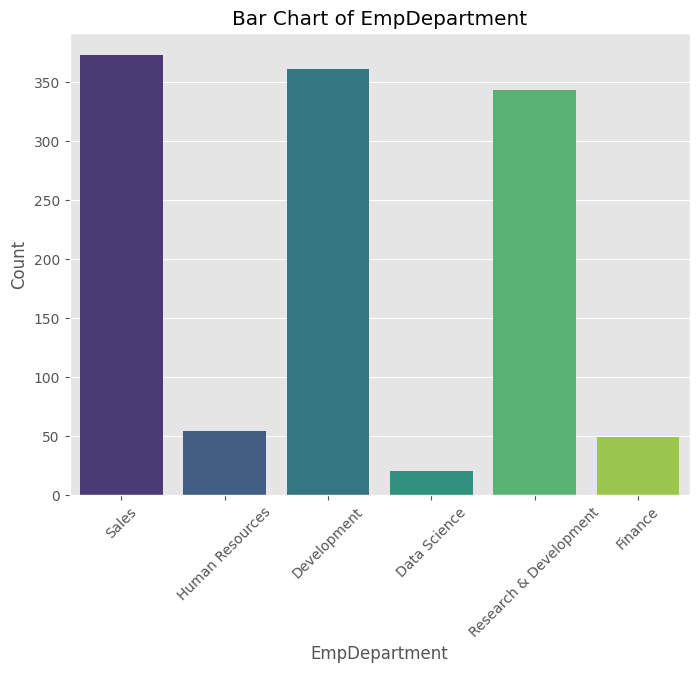

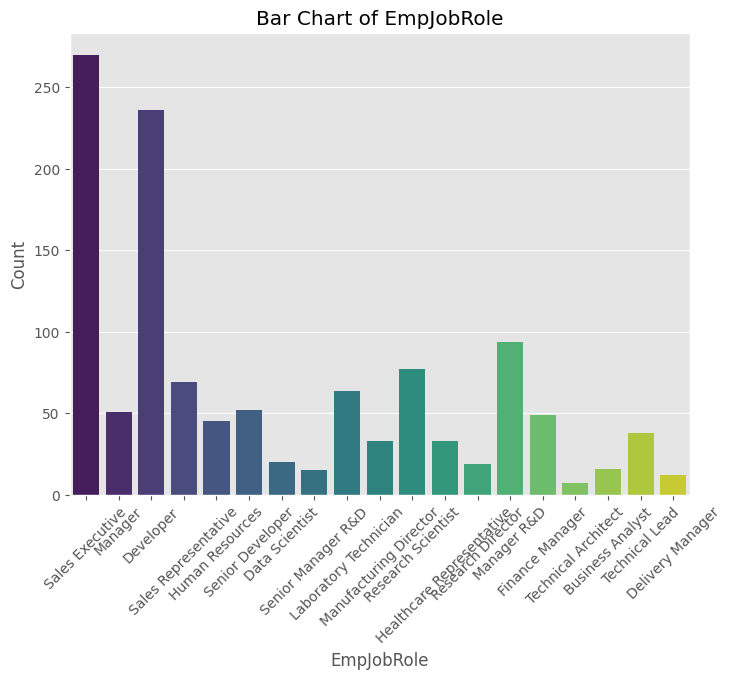

In [32]:
# Plot bar charts for categorical variables
for column in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df_emp_performance, palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

__Perform Label Encoding on Categorical Features__

In [33]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical values
for col in categorical_cols:
    df_emp_performance[col] = label_encoder.fit_transform(df_emp_performance[col])

In [34]:
df_emp_performance.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
0                           4  ...                            4   
1                           4  ...                            4   
2                           4  ...                            3   
3                           2  ...                            2   
4                           1  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                        0                     8          0                  3  
1                        1                     7          0                  3  
2                        1                    12          0                  4  
3                       12                     6          0                  3  
4                        2                     2          0                  3  

[5 rows x 27 columns]

# Check Correlation between Features

In [35]:
df_emp_performance.corr()

Age    Gender  EducationBackground  \
Age                           1.000000 -0.040107            -0.055905   
Gender                       -0.040107  1.000000             0.009922   
EducationBackground          -0.055905  0.009922             1.000000   
MaritalStatus                -0.098368 -0.042169            -0.001097   
EmpDepartment                -0.000104 -0.010925            -0.026874   
EmpJobRole                   -0.037665  0.011332            -0.012325   
BusinessTravelFrequency       0.040579 -0.043608             0.012382   
DistanceFromHome              0.020937 -0.001507            -0.013919   
EmpEducationLevel             0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction    0.013814  0.000033             0.045028   
EmpHourlyRate                 0.062867  0.002218            -0.030234   
EmpJobInvolvement             0.027216  0.010949            -0.025505   
EmpJobLevel                   0.509139 -0.050685            -0.056338   
EmpJobSatisfaction           -0.002436  0.024680            -0.030977   
NumCompaniesWorked            0.284408 -0.036675            -0.032879   
OverTime                      0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent     -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction   0.049749  0.030707             0.005652   
TotalWorkExperienceInYears    0.680886 -0.061055            -0.027929   
TrainingTimesLastYear        -0.016053 -0.057654             0.051596   
EmpWorkLifeBalance           -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany  0.318852 -0.030392            -0.009887   
ExperienceYearsInCurrentRole  0.217163 -0.031823            -0.003215   
YearsSinceLastPromotion       0.228199 -0.021575             0.014277   
YearsWithCurrManager          0.205098 -0.036643             0.002767   
Attrition                    -0.189317  0.035758             0.027161   
PerformanceRating            -0.040164 -0.001780             0.005607   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                               -0.098368      -0.000104   -0.037665   
Gender                            -0.042169      -0.010925    0.011332   
EducationBackground               -0.001097      -0.026874   -0.012325   
MaritalStatus                      1.000000       0.067272    0.038023   
EmpDepartment                      0.067272       1.000000    0.568973   
EmpJobRole                         0.038023       0.568973    1.000000   
BusinessTravelFrequency            0.028520      -0.045233   -0.086251   
DistanceFromHome                  -0.019148       0.007707    0.022939   
EmpEducationLevel                  0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.032467      -0.019237    0.044612   
EmpHourlyRate                     -0.013540       0.003957   -0.016179   
EmpJobInvolvement                 -0.043355      -0.076988   -0.008034   
EmpJobLevel                       -0.087359       0.100526    0.004406   
EmpJobSatisfaction                 0.044593       0.007150    0.032916   
NumCompaniesWorked                -0.030095      -0.033950   -0.009111   
OverTime                          -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent           0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction        0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears        -0.093537       0.016065   -0.049529   
TrainingTimesLastYear              0.026045       0.016438    0.004452   
EmpWorkLifeBalance                 0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany      -0.075728       0.047677   -0.009047   
ExperienceYearsInCurrentRole      -0.076663       0.069602    0.019383   
YearsSinceLastPromotion           -0.052951       0.052315    0.012190   
YearsWithCurrManager              -0.061908       0.033850   -0.004504   
Attrition                          0.162969       0.048006    0.03

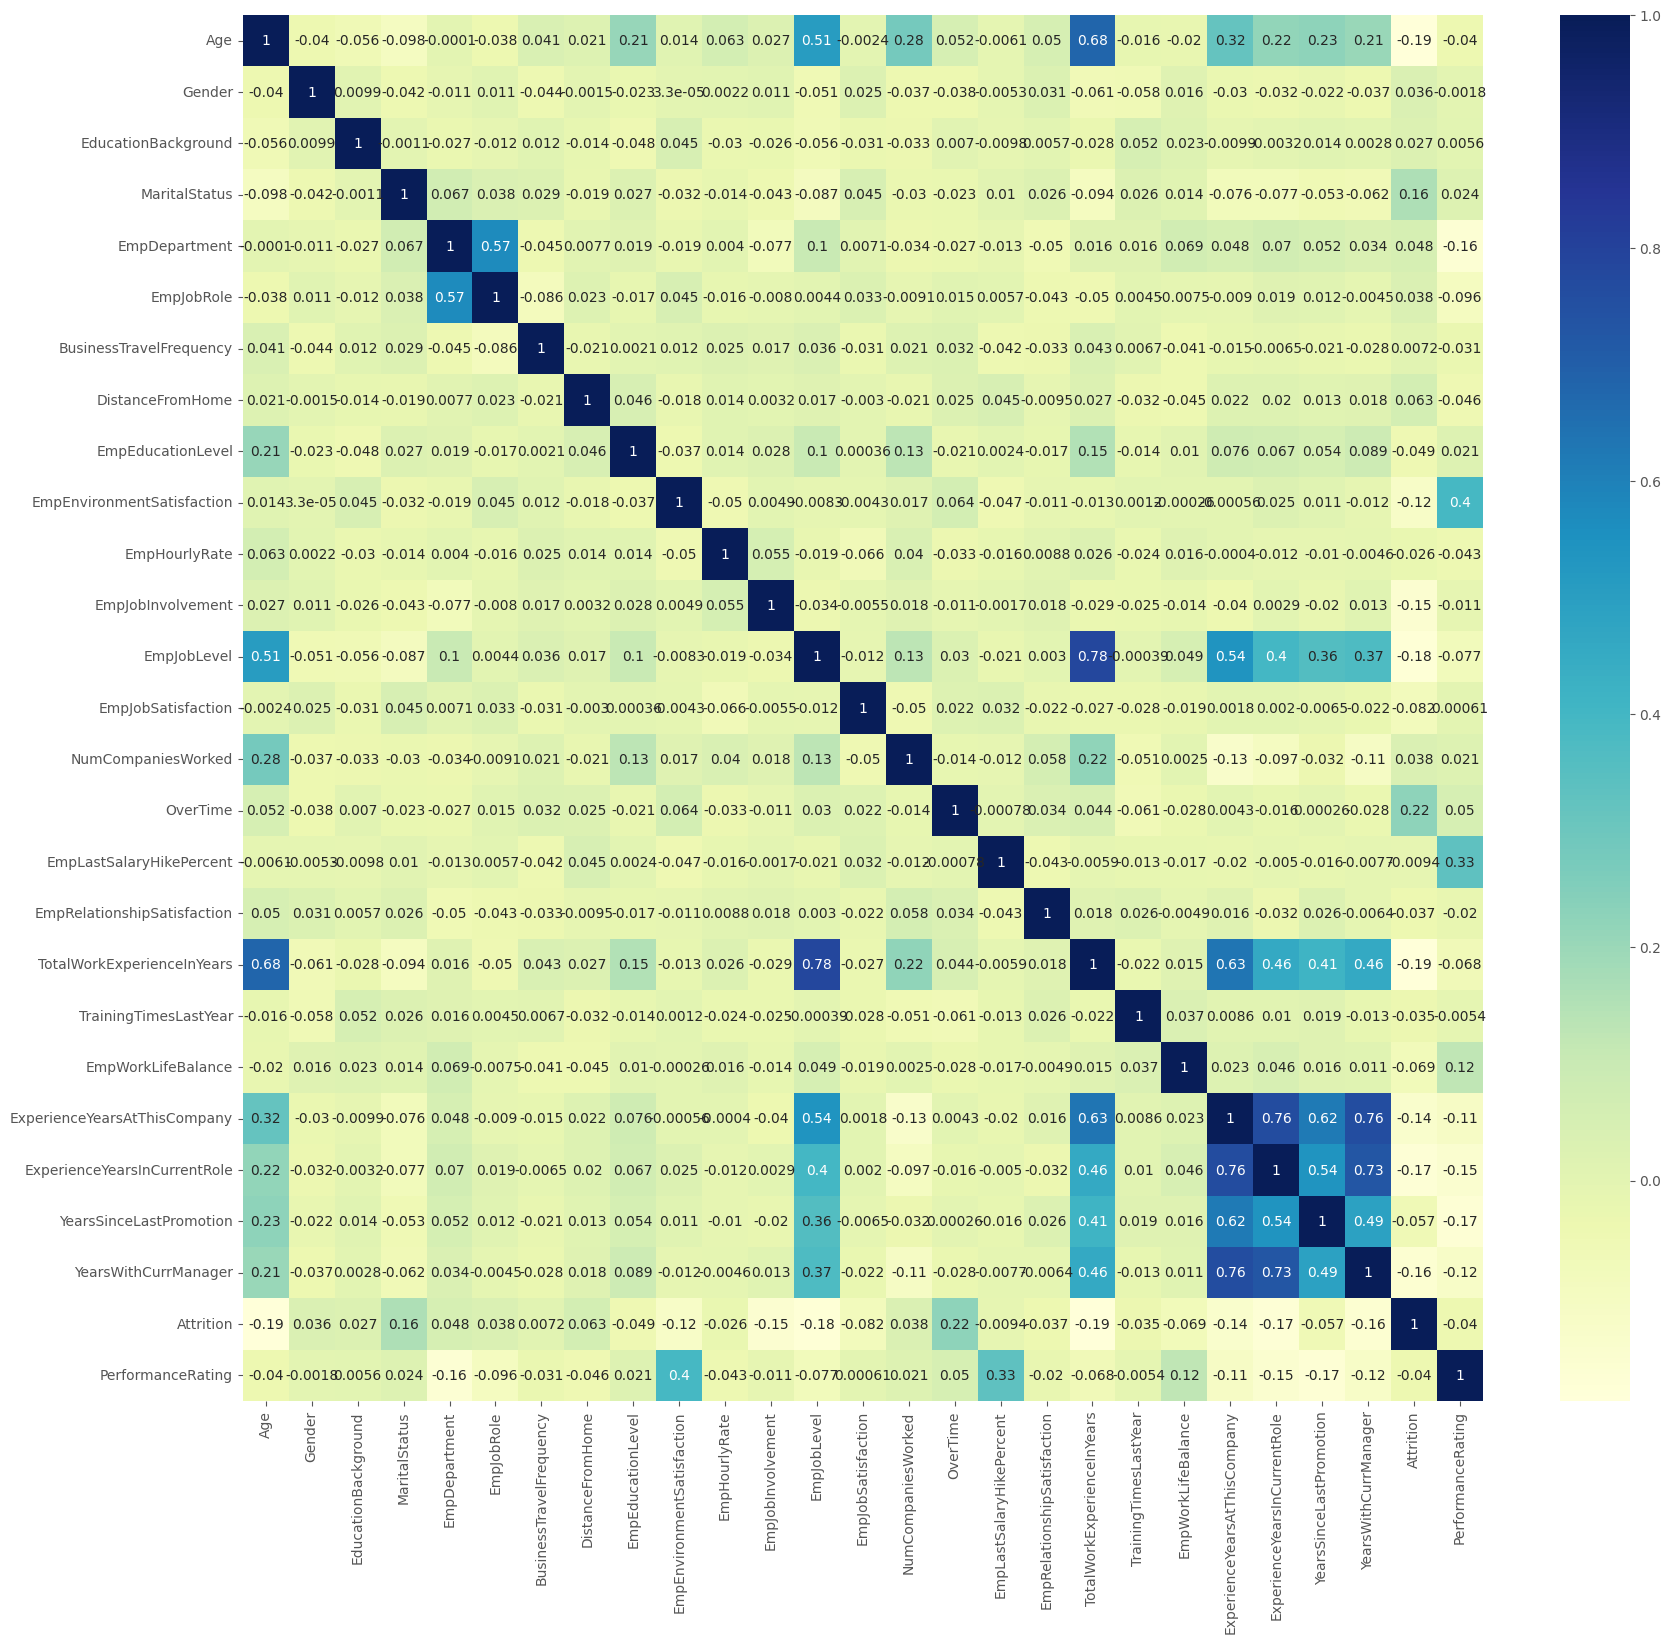

In [36]:
plt.figure(figsize=(20,18))
sns.heatmap(df_emp_performance.corr(), cmap='YlGnBu',annot=True)
plt.show()

# Check Correlation between Features and the Target(Performance Rating)

In [37]:
corr = df_emp_performance.corr()
target_corr = df_emp_performance.corr()['PerformanceRating'].drop('PerformanceRating')
target_corr_sorted = target_corr.sort_values(ascending=False)
target_corr_sorted

EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
OverTime                        0.050206
MaritalStatus                   0.024172
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EducationBackground             0.005607
EmpJobSatisfaction              0.000606
Gender                         -0.001780
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
BusinessTravelFrequency        -0.031025
Attrition                      -0.039796
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
EmpJobRole                     -0.096209
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
EmpDepartment   

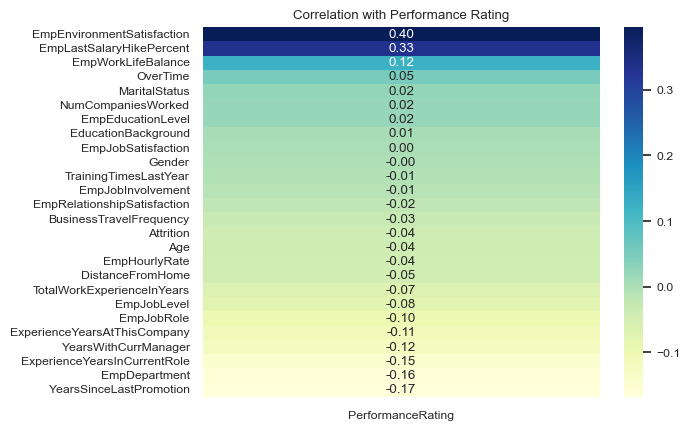

In [38]:
sns.set(font_scale=0.8)
sns.heatmap(target_corr_sorted.to_frame(), annot=True, fmt='.2f', cmap = 'YlGnBu')
plt.title('Correlation with Performance Rating')
plt.show()

In [39]:
X = df_emp_performance.drop('PerformanceRating',axis=1)
y = df_emp_performance['PerformanceRating']

In [40]:
X.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpLastSalaryHikePercent  \
0                           4  ...                        12   
1                           4  ...                        12   
2                           4  ...                        21   
3                           2  ...                        15   
4                           1  ...                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  
0                     8          0  
1                     7          0  
2                    12          0  
3                     6          0  
4                     2          0  

[5 rows x 26 columns]

In [41]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

In [42]:
X_feature_train, X_feature_test, y_feature_train, y_feature_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_feature_train.shape, X_feature_test.shape,y_feature_train.shape, y_feature_test.shape

((960, 26), (240, 26), (960,), (240,))

# Apply RFE with Decision Tree Classifier to Select the Top 3 Most ImportantFeatures

Recursive Feature Elimination (RFE) is a feature selection method that helps you identify the most important features for predicting a target variable by recursively removing the least important features

In [43]:
from sklearn.feature_selection import RFE

# Step 2: Choose an estimator (model)
#model = LogisticRegression(max_iter=1000)  # Use an appropriate model. Here, Logistic Regression is used.
model = DecisionTreeClassifier(random_state=10)

# Step 3: Apply RFE to select top 3 features
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_feature_train, y_feature_train)

# Step 4: Get the selected features
selected_features = X_feature_train.columns[rfe.support_]

# Display the selected features
print("Selected features by RFE:", selected_features)

Selected features by RFE: Index(['EmpEnvironmentSatisfaction', 'EmpLastSalaryHikePercent',
       'YearsSinceLastPromotion'],
      dtype='object')


# Select the Feature Factors for Model Building

In [44]:
X = df_emp_performance.drop('PerformanceRating',axis=1)
y = df_emp_performance['PerformanceRating']

In [45]:
X.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  ...  EmpLastSalaryHikePercent  \
0                           4  ...                        12   
1                           4  ...                        12   
2                           4  ...                        21   
3                           2  ...                        15   
4                           1  ...                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  
0                     8          0  
1                     7          0  
2                    12          0  
3                     6          0  
4                     2          0  

[5 rows x 26 columns]

In [46]:
y.head()

0    3
1    3
2    4
3    3
4    3
Name: PerformanceRating, dtype: int64

# Splitting the Dataset into Training and Test Sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((960, 26), (240, 26), (960,), (240,))

# Addressing Imbalance in the Target Variable Classes using SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [49]:
print(X_train_smote.shape, X_test.shape, y_train_smote.shape, y_test.shape)

(2085, 26) (240, 26) (2085,) (240,)


In [50]:
# Standardization technique is used
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train_smote)
X_test = std_scaler.transform(X_test)

In [51]:
X_train.shape, X_test.shape

((2085, 26), (240, 26))

In [52]:
y_train = y_train_smote

In [53]:
y_train.shape, y_test.shape

((2085,), (240,))

# Model Building and Training

__1. Logistic Regression__

In [54]:
LR_model = LogisticRegression(random_state=10)

# Train the logistic Regression model
LR_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_LR = LR_model.predict(X_test)

In [55]:
#Perform Logistic Regression Model Evaluation
cm = confusion_matrix(y_test, y_pred_LR)

# Calculate evaluation metrics for multiclass classification
LR_Recall = round(recall_score(y_test, y_pred_LR, average='weighted'), 3)
LR_Precision = round(precision_score(y_test, y_pred_LR, average='weighted'), 3)
LR_f1 = round(f1_score(y_test, y_pred_LR, average='weighted'), 3)
LR_accuracy = round(accuracy_score(y_test, y_pred_LR), 3)

# Plotting the confusion matrix
print(cm)
#sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
print(classification_report(y_test,y_pred_LR))

[[ 24  11   3]
 [ 24 133  22]
 [  2   3  18]]
              precision    recall  f1-score   support

           2       0.48      0.63      0.55        38
           3       0.90      0.74      0.82       179
           4       0.42      0.78      0.55        23

    accuracy                           0.73       240
   macro avg       0.60      0.72      0.64       240
weighted avg       0.79      0.73      0.75       240



In [56]:
LR_df = [(LR_accuracy, LR_Recall, LR_Precision, LR_f1)]

LR_score = pd.DataFrame(data = LR_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
LR_score.insert(0, 'Model', 'Logistic Regression Classifier')
LR_score

Model  Accuracy  Recall  Precision  F1 Score
0  Logistic Regression Classifier     0.729   0.729      0.791     0.747

__2. K Nearest Neighbors Classifier__

In [57]:
KNN_model = KNeighborsClassifier()

# Train K-Nearest Neighbor Classifer
KNN_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_KNN = KNN_model.predict(X_test)

In [58]:
#Perform K Nearest Neighbour Model Evaluation
cm = confusion_matrix(y_test, y_pred_KNN)

KNN_Recall = round(recall_score(y_test, y_pred_KNN, average='weighted'),3)
KNN_Precision = round(precision_score(y_test, y_pred_KNN, average='weighted'),3)
KNN_f1 = round(f1_score(y_test, y_pred_KNN, average='weighted'),3)
KNN_accuracy = round(accuracy_score(y_test, y_pred_KNN),3)

print(cm)
print(classification_report(y_test,y_pred_KNN))

[[28  8  2]
 [36 96 47]
 [ 2  5 16]]
              precision    recall  f1-score   support

           2       0.42      0.74      0.54        38
           3       0.88      0.54      0.67       179
           4       0.25      0.70      0.36        23

    accuracy                           0.58       240
   macro avg       0.52      0.66      0.52       240
weighted avg       0.75      0.58      0.62       240



In [59]:
KNN_df = [(KNN_accuracy, KNN_Recall, KNN_Precision, KNN_f1)]

KNN_score = pd.DataFrame(data = KNN_df, columns=
                       ['Accuracy','Recall','Precision','F1 Score'])
KNN_score.insert(0, 'Model', 'K Nearest Neighbour Classifier')
KNN_score

Model  Accuracy  Recall  Precision  F1 Score
0  K Nearest Neighbour Classifier     0.583   0.583      0.748     0.617

In [60]:
SVM_model = SVC(random_state=10)

# Train Support Vector Machine(SVM)
SVM_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_SVM = SVM_model.predict(X_test)

In [61]:
#Perform Support Vector Machines Model Evaluation
cm = confusion_matrix(y_test, y_pred_SVM)

SVM_Recall = round(recall_score(y_test, y_pred_SVM, average='weighted'),3)
SVM_Precision = round(precision_score(y_test, y_pred_SVM, average='weighted'),3)
SVM_f1 = round(f1_score(y_test, y_pred_SVM, average='weighted'),3)
SVM_accuracy = round(accuracy_score(y_test, y_pred_SVM),3)

print(cm)
print(classification_report(y_test,y_pred_SVM))

[[ 20  17   1]
 [ 13 160   6]
 [  1   9  13]]
              precision    recall  f1-score   support

           2       0.59      0.53      0.56        38
           3       0.86      0.89      0.88       179
           4       0.65      0.57      0.60        23

    accuracy                           0.80       240
   macro avg       0.70      0.66      0.68       240
weighted avg       0.80      0.80      0.80       240



In [62]:
SVM_df = [(SVM_accuracy, SVM_Recall, SVM_Precision, SVM_f1)]

SVM_score = pd.DataFrame(data = SVM_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
SVM_score.insert(0, 'Model', 'Support Vector Machine(SVM) Classifier')
SVM_score

Model  Accuracy  Recall  Precision  \
0  Support Vector Machine(SVM) Classifier     0.804   0.804      0.797   

   F1 Score  
0       0.8

In [63]:
RFC_model =  RandomForestClassifier(random_state=10)

# Train Random Forest Classifier
RFC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_RFC = RFC_model.predict(X_test)

In [64]:
# Perform Random Forest Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_RFC)

RFC_Recall = round(recall_score(y_test, y_pred_RFC, average='weighted'),3)
RFC_Precision = round(precision_score(y_test, y_pred_RFC, average='weighted'),3)
RFC_f1 = round(f1_score(y_test, y_pred_RFC,  average='weighted'),3)
RFC_accuracy = round(accuracy_score(y_test, y_pred_RFC),3)

print(cm)
print(classification_report(y_test,y_pred_RFC))

[[ 35   3   0]
 [  3 171   5]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.92      0.92      0.92        38
           3       0.96      0.96      0.96       179
           4       0.79      0.83      0.81        23

    accuracy                           0.94       240
   macro avg       0.89      0.90      0.90       240
weighted avg       0.94      0.94      0.94       240



In [65]:
RFC_df = [(RFC_accuracy, RFC_Recall, RFC_Precision, RFC_f1)]

RFC_score = pd.DataFrame(data = RFC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
RFC_score.insert(0, 'Model', 'Random Forest Classifier')
RFC_score

Model  Accuracy  Recall  Precision  F1 Score
0  Random Forest Classifier     0.938   0.938      0.938     0.938

In [66]:
GBC_model =  GradientBoostingClassifier(random_state=10)

# Train Gradient Boosting Classifier
GBC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GBC = GBC_model.predict(X_test)

In [67]:
# Perform Gradient Boosting Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_GBC)

GBC_Recall = round(recall_score(y_test, y_pred_GBC, average='weighted'),3)
GBC_Precision = round(precision_score(y_test, y_pred_GBC, average='weighted'),3)
GBC_f1 = round(f1_score(y_test, y_pred_GBC, average='weighted'),3)
GBC_accuracy = round(accuracy_score(y_test, y_pred_GBC),3)

print(cm)
print(classification_report(y_test,y_pred_GBC))

[[ 34   4   0]
 [  4 168   7]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.89      0.89      0.89        38
           3       0.95      0.94      0.95       179
           4       0.73      0.83      0.78        23

    accuracy                           0.92       240
   macro avg       0.86      0.89      0.87       240
weighted avg       0.92      0.92      0.92       240



In [68]:
GBC_df = [(GBC_accuracy, GBC_Recall, GBC_Precision, GBC_f1)]

GBC_score = pd.DataFrame(data = GBC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GBC_score.insert(0, 'Model', 'Gradient Boosting Classifier')
GBC_score

Model  Accuracy  Recall  Precision  F1 Score
0  Gradient Boosting Classifier     0.921   0.921      0.924     0.922

In [69]:
DTC_model = DecisionTreeClassifier(random_state=10)

# Train Decision Tree Model
DTC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_DTC = DTC_model.predict(X_test)

In [70]:
# Perform Decision Tree Model Evaluation
cm = confusion_matrix(y_test, y_pred_DTC)

DTC_Recall = round(recall_score(y_test, y_pred_DTC, average='weighted'),3)
DTC_Precision = round(precision_score(y_test, y_pred_DTC, average='weighted'),3)
DTC_f1 = round(f1_score(y_test, y_pred_DTC, average='weighted'),3)
DTC_accuracy = round(accuracy_score(y_test, y_pred_DTC),3)

print(cm)
print(classification_report(y_test,y_pred_DTC))

[[ 24   9   5]
 [  7 154  18]
 [  0   5  18]]
              precision    recall  f1-score   support

           2       0.77      0.63      0.70        38
           3       0.92      0.86      0.89       179
           4       0.44      0.78      0.56        23

    accuracy                           0.82       240
   macro avg       0.71      0.76      0.72       240
weighted avg       0.85      0.82      0.83       240



In [71]:
DTC_df = [(DTC_accuracy, DTC_Recall, DTC_Precision, DTC_f1)]

DTC_score = pd.DataFrame(data = DTC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
DTC_score.insert(0, 'Model', 'Decision Tree Classifier')
DTC_score

Model  Accuracy  Recall  Precision  F1 Score
0  Decision Tree Classifier     0.817   0.817      0.848     0.826

In [72]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GNB = GNB_model.predict(X_test)

In [73]:
#Perform Gaussian Naive Bayes Model Evaluation
cm = confusion_matrix(y_test, y_pred_GNB)

GNB_Recall = round(recall_score(y_test, y_pred_GNB, average='weighted'),3)
GNB_Precision = round(precision_score(y_test, y_pred_GNB, average='weighted'),3)
GNB_f1 = round(f1_score(y_test, y_pred_GNB, average='weighted'),3)
GNB_accuracy = round(accuracy_score(y_test, y_pred_GNB),3)

print(cm)
print(classification_report(y_test,y_pred_GNB))

[[ 23  15   0]
 [ 13 142  24]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.62      0.61      0.61        38
           3       0.88      0.79      0.84       179
           4       0.43      0.78      0.55        23

    accuracy                           0.76       240
   macro avg       0.64      0.73      0.67       240
weighted avg       0.80      0.76      0.77       240



In [74]:
GNB_df = [(GNB_accuracy, GNB_Recall, GNB_Precision, GNB_f1)]

GNB_score = pd.DataFrame(data = GNB_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GNB_score.insert(0, 'Model', 'Gaussian Naive Bayes Classifier')
GNB_score

Model  Accuracy  Recall  Precision  F1 Score
0  Gaussian Naive Bayes Classifier     0.762   0.762      0.797     0.773

In [75]:
MLP_model = MLPClassifier(random_state=10)

# Train MLP Classifier
MLP_model.fit(X_train,y_train)

#Perform prediction on test set
y_pred_MLP = MLP_model.predict(X_test)

In [76]:
# Perform MLP Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_MLP)

MLP_Recall = round(recall_score(y_test, y_pred_MLP, average='weighted'),3)
MLP_Precision = round(precision_score(y_test, y_pred_MLP, average='weighted'),3)
MLP_f1 = round(f1_score(y_test, y_pred_MLP, average='weighted'),3)
MLP_accuracy = round(accuracy_score(y_test, y_pred_MLP),3)

print(cm)
print(classification_report(y_test,y_pred_MLP))

[[ 26   9   3]
 [ 16 153  10]
 [  1   7  15]]
              precision    recall  f1-score   support

           2       0.60      0.68      0.64        38
           3       0.91      0.85      0.88       179
           4       0.54      0.65      0.59        23

    accuracy                           0.81       240
   macro avg       0.68      0.73      0.70       240
weighted avg       0.82      0.81      0.81       240



In [77]:
MLP_df = [(MLP_accuracy, MLP_Recall, MLP_Precision, MLP_f1)]

MLP_score = pd.DataFrame(data = MLP_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
MLP_score.insert(0, 'Model', 'MLP Classifier')
MLP_score

Model  Accuracy  Recall  Precision  F1 Score
0  MLP Classifier     0.808   0.808      0.822     0.814

In [78]:
ETC_model = ExtraTreesClassifier(random_state=10)
ETC_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_ETC = ETC_model.predict(X_test)

In [79]:
# Perform Extra Trees Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_ETC)

ETC_Recall = round(recall_score(y_test, y_pred_ETC, average='weighted'),3)
ETC_Precision = round(precision_score(y_test, y_pred_ETC, average='weighted'),3)
ETC_f1 = round(f1_score(y_test, y_pred_ETC, average='weighted'),3)
ETC_accuracy = round(accuracy_score(y_test, y_pred_ETC),3)

print(cm)
print(classification_report(y_test,y_pred_ETC))

[[ 28  10   0]
 [  6 170   3]
 [  2   7  14]]
              precision    recall  f1-score   support

           2       0.78      0.74      0.76        38
           3       0.91      0.95      0.93       179
           4       0.82      0.61      0.70        23

    accuracy                           0.88       240
   macro avg       0.84      0.77      0.80       240
weighted avg       0.88      0.88      0.88       240



In [80]:
ETC_df = [(ETC_accuracy, ETC_Recall, ETC_Precision, ETC_f1)]

ETC_score = pd.DataFrame(data = ETC_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
ETC_score.insert(0, 'Model', 'Extra Trees Classifier')
ETC_score

Model  Accuracy  Recall  Precision  F1 Score
0  Extra Trees Classifier     0.883   0.883       0.88      0.88

In [81]:
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)

XGB_model = XGBClassifier(random_state=10)

# Train XGBoost Classifier
XGB_model.fit(X_train,y_train_xgb)

#Perform prediction on test set
y_pred_XGB = XGB_model.predict(X_test)
y_pred_XGB = le.inverse_transform(y_pred_XGB)

In [82]:
# Perform XGBoost Classifier Model Evaluation
cm = confusion_matrix(y_test, y_pred_XGB)

XGB_Recall = round(recall_score(y_test, y_pred_XGB, average='weighted'),3)
XGB_Precision = round(precision_score(y_test, y_pred_XGB, average='weighted'),3)
XGB_f1 = round(f1_score(y_test, y_pred_XGB, average='weighted'),3)
XGB_accuracy = round(accuracy_score(y_test, y_pred_XGB),3)

print(cm)
print(classification_report(y_test,y_pred_XGB))

[[ 35   3   0]
 [  4 170   5]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.88      0.92      0.90        38
           3       0.96      0.95      0.96       179
           4       0.78      0.78      0.78        23

    accuracy                           0.93       240
   macro avg       0.87      0.88      0.88       240
weighted avg       0.93      0.93      0.93       240



In [83]:
XGB_df = [(XGB_accuracy, XGB_Recall, XGB_Precision, XGB_f1)]

XGB_score = pd.DataFrame(data = XGB_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
XGB_score.insert(0, 'Model', 'XGBoost Classifier')
XGB_score

Model  Accuracy  Recall  Precision  F1 Score
0  XGBoost Classifier     0.929   0.929       0.93     0.929

In [84]:
%%time
from sklearn.ensemble import VotingClassifier

classifiers = [('RF Classifier', RFC_model),  ('XGBoost Classifier', XGB_model)]

VC_hard = VotingClassifier(estimators=classifiers, voting='hard')
VC_hard.fit(X_train, y_train)

CPU times: total: 2.28 s
Wall time: 477 ms


VotingClassifier(estimators=[('RF Classifier',
                              RandomForestClassifier(random_state=10)),
                             ('XGBoost Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_po...one,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

In [85]:
y_pred_VC_hard = VC_hard.predict(X_test)
cm = confusion_matrix(y_test, y_pred_VC_hard)

VC_hard_Recall = round(recall_score(y_test, y_pred_VC_hard, average='weighted'),3)
VC_hard_Precision = round(precision_score(y_test, y_pred_VC_hard, average='weighted'),3)
VC_hard_f1 = round(f1_score(y_test, y_pred_VC_hard, average='weighted'),3)
VC_hard_accuracy = round(accuracy_score(y_test, y_pred_VC_hard),3)

print(cm)
print(classification_report(y_test,y_pred_VC_hard))

[[ 36   2   0]
 [  4 170   5]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.88      0.95      0.91        38
           3       0.97      0.95      0.96       179
           4       0.78      0.78      0.78        23

    accuracy                           0.93       240
   macro avg       0.88      0.89      0.88       240
weighted avg       0.93      0.93      0.93       240



In [86]:
VC_hard_df = [(VC_hard_accuracy, VC_hard_Recall, VC_hard_Precision, VC_hard_f1)]

VC_hard_score = pd.DataFrame(data = VC_hard_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
VC_hard_score.insert(0, 'Model', 'Hard Voting Classifier')
VC_hard_score

Model  Accuracy  Recall  Precision  F1 Score
0  Hard Voting Classifier     0.933   0.933      0.934     0.934

In [87]:
combined_models_df = pd.concat([LR_score, KNN_score, SVM_score, RFC_score, GBC_score, XGB_score, MLP_score,
                               DTC_score, GNB_score, ETC_score, VC_hard_score], ignore_index=True)
combined_models_df_sorted = combined_models_df.sort_values(by=['Accuracy', 'Recall', 'Precision'], ascending=False)
combined_models_df_sorted_reset = combined_models_df_sorted.reset_index(drop=True)
combined_models_df_sorted_reset

Model  Accuracy  Recall  Precision  \
0                 Random Forest Classifier     0.938   0.938      0.938   
1                   Hard Voting Classifier     0.933   0.933      0.934   
2                       XGBoost Classifier     0.929   0.929      0.930   
3             Gradient Boosting Classifier     0.921   0.921      0.924   
4                   Extra Trees Classifier     0.883   0.883      0.880   
5                 Decision Tree Classifier     0.817   0.817      0.848   
6                           MLP Classifier     0.808   0.808      0.822   
7   Support Vector Machine(SVM) Classifier     0.804   0.804      0.797   
8          Gaussian Naive Bayes Classifier     0.762   0.762      0.797   
9           Logistic Regression Classifier     0.729   0.729      0.791   
10          K Nearest Neighbour Classifier     0.583   0.583      0.748   

    F1 Score  
0      0.938  
1      0.934  
2      0.929  
3      0.922  
4      0.880  
5      0.826  
6      0.814  
7      0.800  
8      0.773  
9      0.747  
10     0.617

# Hyper Parameter Tuning of the Models

In [88]:
%%time
# Define the parameter grid with an expanded range
param_grid2 = {
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Perform Grid Search CV with the expanded parameter grid
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_knn = grid_search.best_params_
print(best_params_knn)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: total: 5min 1s
Wall time: 1min 33s


In [89]:
KNN_tuned_model = KNeighborsClassifier(**best_params_knn)
KNN_tuned_model.fit(X_train, y_train)
y_pred_KNN_tuned = KNN_tuned_model.predict(X_test)

In [90]:
cm = confusion_matrix(y_test, y_pred_KNN_tuned)

KNN_tuned_Recall = round(recall_score(y_test, y_pred_KNN_tuned, average='weighted'),3)
KNN_tuned_Precision = round(precision_score(y_test, y_pred_KNN_tuned, average='weighted'),3)
KNN_tuned_f1 = round(f1_score(y_test, y_pred_KNN_tuned, average='weighted'),3)
KNN_tuned_accuracy = round(accuracy_score(y_test, y_pred_KNN_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_KNN_tuned))

[[ 24  12   2]
 [ 36 110  33]
 [  4   9  10]]
              precision    recall  f1-score   support

           2       0.38      0.63      0.47        38
           3       0.84      0.61      0.71       179
           4       0.22      0.43      0.29        23

    accuracy                           0.60       240
   macro avg       0.48      0.56      0.49       240
weighted avg       0.71      0.60      0.63       240



In [91]:
KNN_tuned_df = [(KNN_tuned_accuracy, KNN_tuned_Recall, KNN_tuned_Precision, KNN_tuned_f1)]

KNN_tuned_score = pd.DataFrame(data = KNN_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
KNN_tuned_score.insert(0, 'Model', 'Tuned KNN Classifier')
KNN_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned KNN Classifier       0.6     0.6      0.707     0.632

In [92]:
%%time
# Define the parameter grid to search
param_grid_gbc = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform Randomized Search CV with the expanded parameter grid
random_search_gbc = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=param_grid_gbc, 
                                       n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Perform the grid search
random_search_gbc.fit(X_train, y_train)

# Get the best parameters
best_params_gbc = random_search_gbc.best_params_
print("Best Parameters:", best_params_gbc)

Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
CPU times: total: 1.92 s
Wall time: 19.9 s


In [93]:
# Train Gradient Boosting Classifier with the best parameters
GBC_tuned_model = GradientBoostingClassifier(**best_params_gbc, random_state=42)
GBC_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GBC_tuned = GBC_tuned_model.predict(X_test)

In [94]:
cm = confusion_matrix(y_test, y_pred_GBC_tuned)

GBC_tuned_Recall = round(recall_score(y_test, y_pred_GBC_tuned, average='weighted'),3)
GBC_tuned_Precision = round(precision_score(y_test, y_pred_GBC_tuned, average='weighted'),3)
GBC_tuned_f1 = round(f1_score(y_test, y_pred_GBC_tuned, average='weighted'),3)
GBC_tuned_accuracy = round(accuracy_score(y_test, y_pred_GBC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_GBC_tuned))

[[ 34   4   0]
 [  5 171   3]
 [  0   4  19]]
              precision    recall  f1-score   support

           2       0.87      0.89      0.88        38
           3       0.96      0.96      0.96       179
           4       0.86      0.83      0.84        23

    accuracy                           0.93       240
   macro avg       0.90      0.89      0.89       240
weighted avg       0.93      0.93      0.93       240



In [95]:
GBC_tuned_df = [(GBC_tuned_accuracy, GBC_tuned_Recall, GBC_tuned_Precision, GBC_tuned_f1)]

GBC_tuned_score = pd.DataFrame(data = GBC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GBC_tuned_score.insert(0, 'Model', 'Tuned Gradient Boosting Classifier')
GBC_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned Gradient Boosting Classifier     0.933   0.933      0.933     0.933

In [96]:
%%time
# Define the parameter grid with an expanded range
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Expanded range for regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Added 'newton-cg'
    'max_iter': [50, 100, 200, 300, 400, 500]  # Expanded range for maximum iterations
}

# Perform Grid Search CV with the expanded parameter grid
grid_search_lr = GridSearchCV(LogisticRegression(multi_class='auto'), param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print(best_params_lr)

{'C': 100, 'max_iter': 50, 'solver': 'liblinear'}
CPU times: total: 9.86 s
Wall time: 9.88 s


In [97]:
LR_tuned_model = LogisticRegression(**best_params_lr, random_state=10)
LR_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_LR_tuned = LR_tuned_model.predict(X_test)

In [98]:
cm = confusion_matrix(y_test, y_pred_LR_tuned)

LR_tuned_Recall = round(recall_score(y_test, y_pred_LR_tuned, average='weighted'),3)
LR_tuned_Precision = round(precision_score(y_test, y_pred_LR_tuned, average='weighted'),3)
LR_tuned_f1 = round(f1_score(y_test, y_pred_LR_tuned, average='weighted'),3)
LR_tuned_accuracy = round(accuracy_score(y_test, y_pred_LR_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_LR_tuned))

[[ 25   9   4]
 [ 23 136  20]
 [  2   2  19]]
              precision    recall  f1-score   support

           2       0.50      0.66      0.57        38
           3       0.93      0.76      0.83       179
           4       0.44      0.83      0.58        23

    accuracy                           0.75       240
   macro avg       0.62      0.75      0.66       240
weighted avg       0.81      0.75      0.77       240



In [99]:
LR_tuned_df = [(LR_tuned_accuracy, LR_tuned_Recall, LR_tuned_Precision, LR_tuned_f1)]

LR_tuned_score = pd.DataFrame(data = LR_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
LR_tuned_score.insert(0, 'Model', 'Tuned Logistic Regression Classifier')
LR_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned Logistic Regression Classifier      0.75    0.75      0.812     0.767

In [100]:
%%time
# Define the parameter grid for Random Forest

param_grid_rf=[{'min_samples_split':[1,2,3,4,5],'n_estimators': [20, 25, 30, 35, 40, 50, 100, 150],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

rf_classifier=RandomForestClassifier(random_state=42)
# Perform Grid Search CV with Random Forest
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=10, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Print the best parameters
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
CPU times: total: 3.64 s
Wall time: 1min 2s


In [101]:
RFC_tuned = RandomForestClassifier(**best_params_rf,random_state=42)
RFC_tuned.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_RFC_tuned = RFC_tuned.predict(X_test)

In [102]:
cm = confusion_matrix(y_test, y_pred_RFC_tuned)

RFC_tuned_Recall = round(recall_score(y_test, y_pred_RFC_tuned, average='weighted'),3)
RFC_tuned_Precision = round(precision_score(y_test, y_pred_RFC_tuned, average='weighted'),3)
RFC_tuned_f1 = round(f1_score(y_test, y_pred_RFC_tuned, average='weighted'),3)
RFC_tuned_accuracy = round(accuracy_score(y_test, y_pred_RFC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_RFC_tuned))

[[ 35   3   0]
 [  4 169   6]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.88      0.92      0.90        38
           3       0.96      0.94      0.95       179
           4       0.75      0.78      0.77        23

    accuracy                           0.93       240
   macro avg       0.86      0.88      0.87       240
weighted avg       0.93      0.93      0.93       240



In [103]:
RFC_tuned_df = [(RFC_tuned_accuracy, RFC_tuned_Recall, RFC_tuned_Precision, RFC_tuned_f1)]

RFC_tuned_score = pd.DataFrame(data = RFC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
RFC_tuned_score.insert(0, 'Model', 'Tuned Random Forest Classifier')
RFC_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned Random Forest Classifier     0.925   0.925      0.927     0.926

In [104]:
%%time
# Support Machine Classifier with hyperparameter
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Perform Randomized Search CV with the expanded parameter grid
random_search_svm = GridSearchCV(estimator = SVC(random_state=10), param_grid=param_grid_svm,cv=3, scoring='accuracy', n_jobs=-1)
random_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = random_search_svm.best_params_
print(best_params_svm)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
CPU times: total: 375 ms
Wall time: 4.12 s


In [105]:
SVM_tuned_model = SVC(**best_params_svm, random_state=10)
SVM_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_SVM_tuned = SVM_tuned_model.predict(X_test)

In [106]:
cm = confusion_matrix(y_test, y_pred_SVM_tuned)

SVM_tuned_Recall = round(recall_score(y_test, y_pred_SVM_tuned, average='weighted'),3)
SVM_tuned_Precision = round(precision_score(y_test, y_pred_SVM_tuned, average='weighted'),3)
SVM_tuned_f1 = round(f1_score(y_test, y_pred_SVM_tuned, average='weighted'),3)
SVM_tuned_accuracy = round(accuracy_score(y_test, y_pred_SVM_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_SVM_tuned))

[[  8  30   0]
 [  7 170   2]
 [  0  16   7]]
              precision    recall  f1-score   support

           2       0.53      0.21      0.30        38
           3       0.79      0.95      0.86       179
           4       0.78      0.30      0.44        23

    accuracy                           0.77       240
   macro avg       0.70      0.49      0.53       240
weighted avg       0.75      0.77      0.73       240



In [107]:
SVM_tuned_df = [(SVM_tuned_accuracy, SVM_tuned_Recall, SVM_tuned_Precision, SVM_tuned_f1)]

SVM_tuned_score = pd.DataFrame(data = SVM_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
SVM_tuned_score.insert(0, 'Model', 'Tuned SVM Classifier')
SVM_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned SVM Classifier     0.771   0.771      0.746     0.732

In [108]:
%%time
# Define the expanded parameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(100,100,100)],
    'learning_rate_init' : [0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [2000],  # Add max_iter parameter
    'early_stopping': [True, False],  # Add early_stopping parameter
}

# Perform Grid Search CV with the expanded parameter grid
random_search_mlp = GridSearchCV(estimator=MLPClassifier(random_state=10),
                                 param_grid=param_grid_mlp,
                                 cv=5,
                                 n_jobs=-1,
                                 scoring='accuracy')

# Fit the model
random_search_mlp.fit(X_train, y_train)

# Get the best parameters
best_params_mlp = random_search_mlp.best_params_
print(best_params_mlp)

{'early_stopping': False, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 2000}
CPU times: total: 5.34 s
Wall time: 6.15 s


In [109]:
MLP_tuned_model = MLPClassifier(**best_params_mlp, random_state=10)
MLP_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_MLP_tuned = MLP_tuned_model.predict(X_test)

In [110]:
cm = confusion_matrix(y_test, y_pred_MLP_tuned)

MLP_tuned_Recall = round(recall_score(y_test, y_pred_MLP_tuned, average='weighted'),3)
MLP_tuned_Precision = round(precision_score(y_test, y_pred_MLP_tuned, average='weighted'),3)
MLP_tuned_f1 = round(f1_score(y_test, y_pred_MLP_tuned, average='weighted'),3)
MLP_tuned_accuracy = round(accuracy_score(y_test, y_pred_MLP_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_MLP_tuned))

[[ 26   9   3]
 [ 17 153   9]
 [  0   8  15]]
              precision    recall  f1-score   support

           2       0.60      0.68      0.64        38
           3       0.90      0.85      0.88       179
           4       0.56      0.65      0.60        23

    accuracy                           0.81       240
   macro avg       0.69      0.73      0.71       240
weighted avg       0.82      0.81      0.81       240



In [111]:
MLP_tuned_df = [(MLP_tuned_accuracy, MLP_tuned_Recall, MLP_tuned_Precision, MLP_tuned_f1)]

MLP_tuned_score = pd.DataFrame(data = MLP_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
MLP_tuned_score.insert(0, 'Model', 'Tuned MLP Classifier')
MLP_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned MLP Classifier     0.808   0.808       0.82     0.813

In [112]:
%%time

# Define the parameter grid
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

# Perform Grid Search CV
grid_search_nb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Get the best parameters
best_params_nb = grid_search_nb.best_params_

print("Best Parameters:", best_params_nb)

Best Parameters: {'var_smoothing': 0.001}
CPU times: total: 125 ms
Wall time: 104 ms


In [113]:
GNB_tuned_model = GaussianNB(**best_params_nb)
GNB_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_GNB_tuned = GNB_tuned_model.predict(X_test)

In [114]:
cm = confusion_matrix(y_test, y_pred_GNB_tuned)

GNB_tuned_Recall = round(recall_score(y_test, y_pred_GNB_tuned, average='weighted'),3)
GNB_tuned_Precision = round(precision_score(y_test, y_pred_GNB_tuned, average='weighted'),3)
GNB_tuned_f1 = round(f1_score(y_test, y_pred_GNB_tuned, average='weighted'),3)
GNB_tuned_accuracy = round(accuracy_score(y_test, y_pred_GNB_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_GNB_tuned))

[[ 23  15   0]
 [ 13 142  24]
 [  1   4  18]]
              precision    recall  f1-score   support

           2       0.62      0.61      0.61        38
           3       0.88      0.79      0.84       179
           4       0.43      0.78      0.55        23

    accuracy                           0.76       240
   macro avg       0.64      0.73      0.67       240
weighted avg       0.80      0.76      0.77       240



In [115]:
GNB_tuned_df = [(GNB_tuned_accuracy, GNB_tuned_Recall, GNB_tuned_Precision, GNB_tuned_f1)]

GNB_tuned_score = pd.DataFrame(data = GNB_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
GNB_tuned_score.insert(0, 'Model', 'Tuned GNB Classifier')
GNB_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned GNB Classifier     0.762   0.762      0.797     0.773

In [116]:
%%time
# Define the XGB parameter grid
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [25, 50, 100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 10, 12, 15, 20],
    'min_child_weight': [1, 2, 3, 4, 5]
}
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
# Perform Randomized Search CV with XGBoost
random_search_xgb = RandomizedSearchCV(XGBClassifier(random_state=42), param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='accuracy')
random_search_xgb.fit(X_train, y_train_xgb)

# Get the best parameters
best_params_xgb = random_search_xgb.best_params_
print(best_params_xgb)

{'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 20, 'learning_rate': 0.3}
CPU times: total: 30min 35s
Wall time: 3min 7s


In [117]:
XGB_tuned_model = XGBClassifier(**best_params_xgb,random_state=42)
XGB_tuned_model.fit(X_train, y_train_xgb)
#Predict the response for test dataset
y_pred_XGB_tuned = XGB_tuned_model.predict(X_test)
y_pred_XGB_tuned = le.inverse_transform(y_pred_XGB_tuned)

In [118]:
cm = confusion_matrix(y_test, y_pred_XGB_tuned)

XGB_tuned_Recall = round(recall_score(y_test, y_pred_XGB_tuned, average='weighted'),3)
XGB_tuned_Precision = round(precision_score(y_test, y_pred_XGB_tuned, average='weighted'),3)
XGB_tuned_f1 = round(f1_score(y_test, y_pred_XGB_tuned, average='weighted'),3)
XGB_tuned_accuracy = round(accuracy_score(y_test, y_pred_XGB_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_XGB_tuned))

[[ 35   3   0]
 [  4 168   7]
 [  1   3  19]]
              precision    recall  f1-score   support

           2       0.88      0.92      0.90        38
           3       0.97      0.94      0.95       179
           4       0.73      0.83      0.78        23

    accuracy                           0.93       240
   macro avg       0.86      0.90      0.87       240
weighted avg       0.93      0.93      0.93       240



In [119]:
XGB_tuned_df = [(XGB_tuned_accuracy, XGB_tuned_Recall, XGB_tuned_Precision, XGB_tuned_f1)]

XGB_tuned_score = pd.DataFrame(data = XGB_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
XGB_tuned_score.insert(0, 'Model', 'Tuned XGBoost Classifier')
XGB_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned XGBoost Classifier     0.925   0.925      0.929     0.926

In [120]:
%%time
# Decision Tree classifier with hyperparameter
clf_dt = DecisionTreeClassifier()

# Define an expanded parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Randomized Search CV with the expanded parameter grid
random_search_dt = RandomizedSearchCV(clf_dt, param_distributions=param_grid_dt, cv=10, scoring='accuracy', n_jobs=-1)
random_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = random_search_dt.best_params_
print(best_params_dt)

{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
CPU times: total: 344 ms
Wall time: 189 ms


In [121]:
DTC_tuned = DecisionTreeClassifier(**best_params_dt, random_state=42)
DTC_tuned.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_DTC_tuned = DTC_tuned.predict(X_test)

In [122]:
cm = confusion_matrix(y_test, y_pred_DTC_tuned)

DTC_tuned_Recall = round(recall_score(y_test, y_pred_DTC_tuned, average='weighted'),3)
DTC_tuned_Precision = round(precision_score(y_test, y_pred_DTC_tuned, average='weighted'),3)
DTC_tuned_f1 = round(f1_score(y_test, y_pred_DTC_tuned, average='weighted'),3)
DTC_tuned_accuracy = round(accuracy_score(y_test, y_pred_DTC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_DTC_tuned))

[[ 33   5   0]
 [ 12 155  12]
 [  1   5  17]]
              precision    recall  f1-score   support

           2       0.72      0.87      0.79        38
           3       0.94      0.87      0.90       179
           4       0.59      0.74      0.65        23

    accuracy                           0.85       240
   macro avg       0.75      0.82      0.78       240
weighted avg       0.87      0.85      0.86       240



In [123]:
DTC_tuned_df = [(DTC_tuned_accuracy, DTC_tuned_Recall, DTC_tuned_Precision, DTC_tuned_f1)]

DTC_tuned_score = pd.DataFrame(data = DTC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
DTC_tuned_score.insert(0, 'Model', 'Tuned Decision Tree Classifier')
DTC_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned Decision Tree Classifier     0.854   0.854       0.87     0.859

In [124]:
%%time
from scipy.stats import randint
# Define the parameter grid for Extra Trees Classifier
params_etc = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None] + list(range(10, 110, 10)),  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Perform Randomized Search CV with Extra Trees Classifier
random_search_ETC = RandomizedSearchCV(ExtraTreesClassifier(random_state=42), param_distributions=params_etc, n_iter=100, cv=5, scoring='accuracy', random_state=10)
random_search_ETC.fit(X_train, y_train)

# Get the best parameters
best_params_ETC = random_search_ETC.best_params_
print(best_params_ETC)

{'bootstrap': False, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 621}
CPU times: total: 2min 48s
Wall time: 2min 48s


In [125]:
ETC_tuned_model = ExtraTreesClassifier(**best_params_ETC,random_state=42)
ETC_tuned_model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_ETC_tuned = ETC_tuned_model.predict(X_test)

In [126]:
cm = confusion_matrix(y_test, y_pred_ETC_tuned)

ETC_tuned_Recall = round(recall_score(y_test, y_pred_ETC_tuned, average='weighted'),3)
ETC_tuned_Precision = round(precision_score(y_test, y_pred_ETC_tuned, average='weighted'),3)
ETC_tuned_f1 = round(f1_score(y_test, y_pred_ETC_tuned, average='weighted'),3)
ETC_tuned_accuracy = round(accuracy_score(y_test, y_pred_ETC_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_ETC_tuned))

[[ 29   8   1]
 [  8 166   5]
 [  1   6  16]]
              precision    recall  f1-score   support

           2       0.76      0.76      0.76        38
           3       0.92      0.93      0.92       179
           4       0.73      0.70      0.71        23

    accuracy                           0.88       240
   macro avg       0.80      0.80      0.80       240
weighted avg       0.88      0.88      0.88       240



In [127]:
ETC_tuned_df = [(ETC_tuned_accuracy, ETC_tuned_Recall, ETC_tuned_Precision, ETC_tuned_f1)]

ETC_tuned_score = pd.DataFrame(data = ETC_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
ETC_tuned_score.insert(0, 'Model', 'Tuned Extra Trees Classifier')
ETC_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned Extra Trees Classifier     0.879   0.879      0.878     0.879

In [128]:
%%time
from sklearn.ensemble import VotingClassifier

classifiers = [('Tuned XGB Classifier', XGB_tuned_model), ('Tuned GBC Classifier', GBC_tuned_model)]

VC_hard_tuned = VotingClassifier(estimators=classifiers, voting='hard')
VC_hard_tuned.fit(X_train, y_train)

CPU times: total: 2.89 s
Wall time: 1.37 s


VotingClassifier(estimators=[('Tuned XGB Classifier',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=N...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None, min_child_weight=2,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('Tuned GBC Classifier',
                              GradientBoostingClassifier(max_depth=4,
                                                         min_samples_leaf=2,
                                                         random_state=42,
                                                         subsample=0.9))])

In [129]:
y_pred_VC_hard_tuned = VC_hard_tuned.predict(X_test)
cm = confusion_matrix(y_test, y_pred_VC_hard_tuned)

VC_hard_tuned_Recall = round(recall_score(y_test, y_pred_VC_hard_tuned, average='weighted'),3)
VC_hard_tuned_Precision = round(precision_score(y_test, y_pred_VC_hard_tuned, average='weighted'),3)
VC_hard_tuned_f1 = round(f1_score(y_test, y_pred_VC_hard_tuned, average='weighted'),3)
VC_hard_tuned_accuracy = round(accuracy_score(y_test, y_pred_VC_hard_tuned),3)

print(cm)
print(classification_report(y_test,y_pred_VC_hard_tuned))

[[ 35   3   0]
 [  5 172   2]
 [  1   3  19]]
              precision    recall  f1-score   support

           2       0.85      0.92      0.89        38
           3       0.97      0.96      0.96       179
           4       0.90      0.83      0.86        23

    accuracy                           0.94       240
   macro avg       0.91      0.90      0.90       240
weighted avg       0.94      0.94      0.94       240



In [130]:
VC_hard_tuned_df = [(VC_hard_tuned_accuracy, VC_hard_tuned_Recall, VC_hard_tuned_Precision, VC_hard_tuned_f1)]

VC_hard_tuned_score = pd.DataFrame(data = VC_hard_tuned_df, columns=
                        ['Accuracy','Recall','Precision','F1 Score'])
VC_hard_tuned_score.insert(0, 'Model', 'Tuned Hard Voting Classifier')
VC_hard_tuned_score

Model  Accuracy  Recall  Precision  F1 Score
0  Tuned Hard Voting Classifier     0.942   0.942      0.943     0.942

In [131]:
combined_tuned_models_df = pd.concat([LR_tuned_score, KNN_tuned_score, SVM_tuned_score, RFC_tuned_score, GBC_tuned_score, XGB_tuned_score, MLP_tuned_score,
                               DTC_tuned_score, GNB_tuned_score, ETC_tuned_score, VC_hard_tuned_score], ignore_index=True)
combined_tuned_models_df_sorted = combined_tuned_models_df.sort_values(by=['Accuracy', 'Recall', 'Precision'], ascending=False)
combined_tuned_models_df_sorted_reset = combined_tuned_models_df_sorted.reset_index(drop=True)
combined_tuned_models_df_sorted_reset

Model  Accuracy  Recall  Precision  \
0           Tuned Hard Voting Classifier     0.942   0.942      0.943   
1     Tuned Gradient Boosting Classifier     0.933   0.933      0.933   
2               Tuned XGBoost Classifier     0.925   0.925      0.929   
3         Tuned Random Forest Classifier     0.925   0.925      0.927   
4           Tuned Extra Trees Classifier     0.879   0.879      0.878   
5         Tuned Decision Tree Classifier     0.854   0.854      0.870   
6                   Tuned MLP Classifier     0.808   0.808      0.820   
7                   Tuned SVM Classifier     0.771   0.771      0.746   
8                   Tuned GNB Classifier     0.762   0.762      0.797   
9   Tuned Logistic Regression Classifier     0.750   0.750      0.812   
10                  Tuned KNN Classifier     0.600   0.600      0.707   

    F1 Score  
0      0.942  
1      0.933  
2      0.926  
3      0.926  
4      0.879  
5      0.859  
6      0.813  
7      0.732  
8      0.773  
9      0.767  
10     0.632

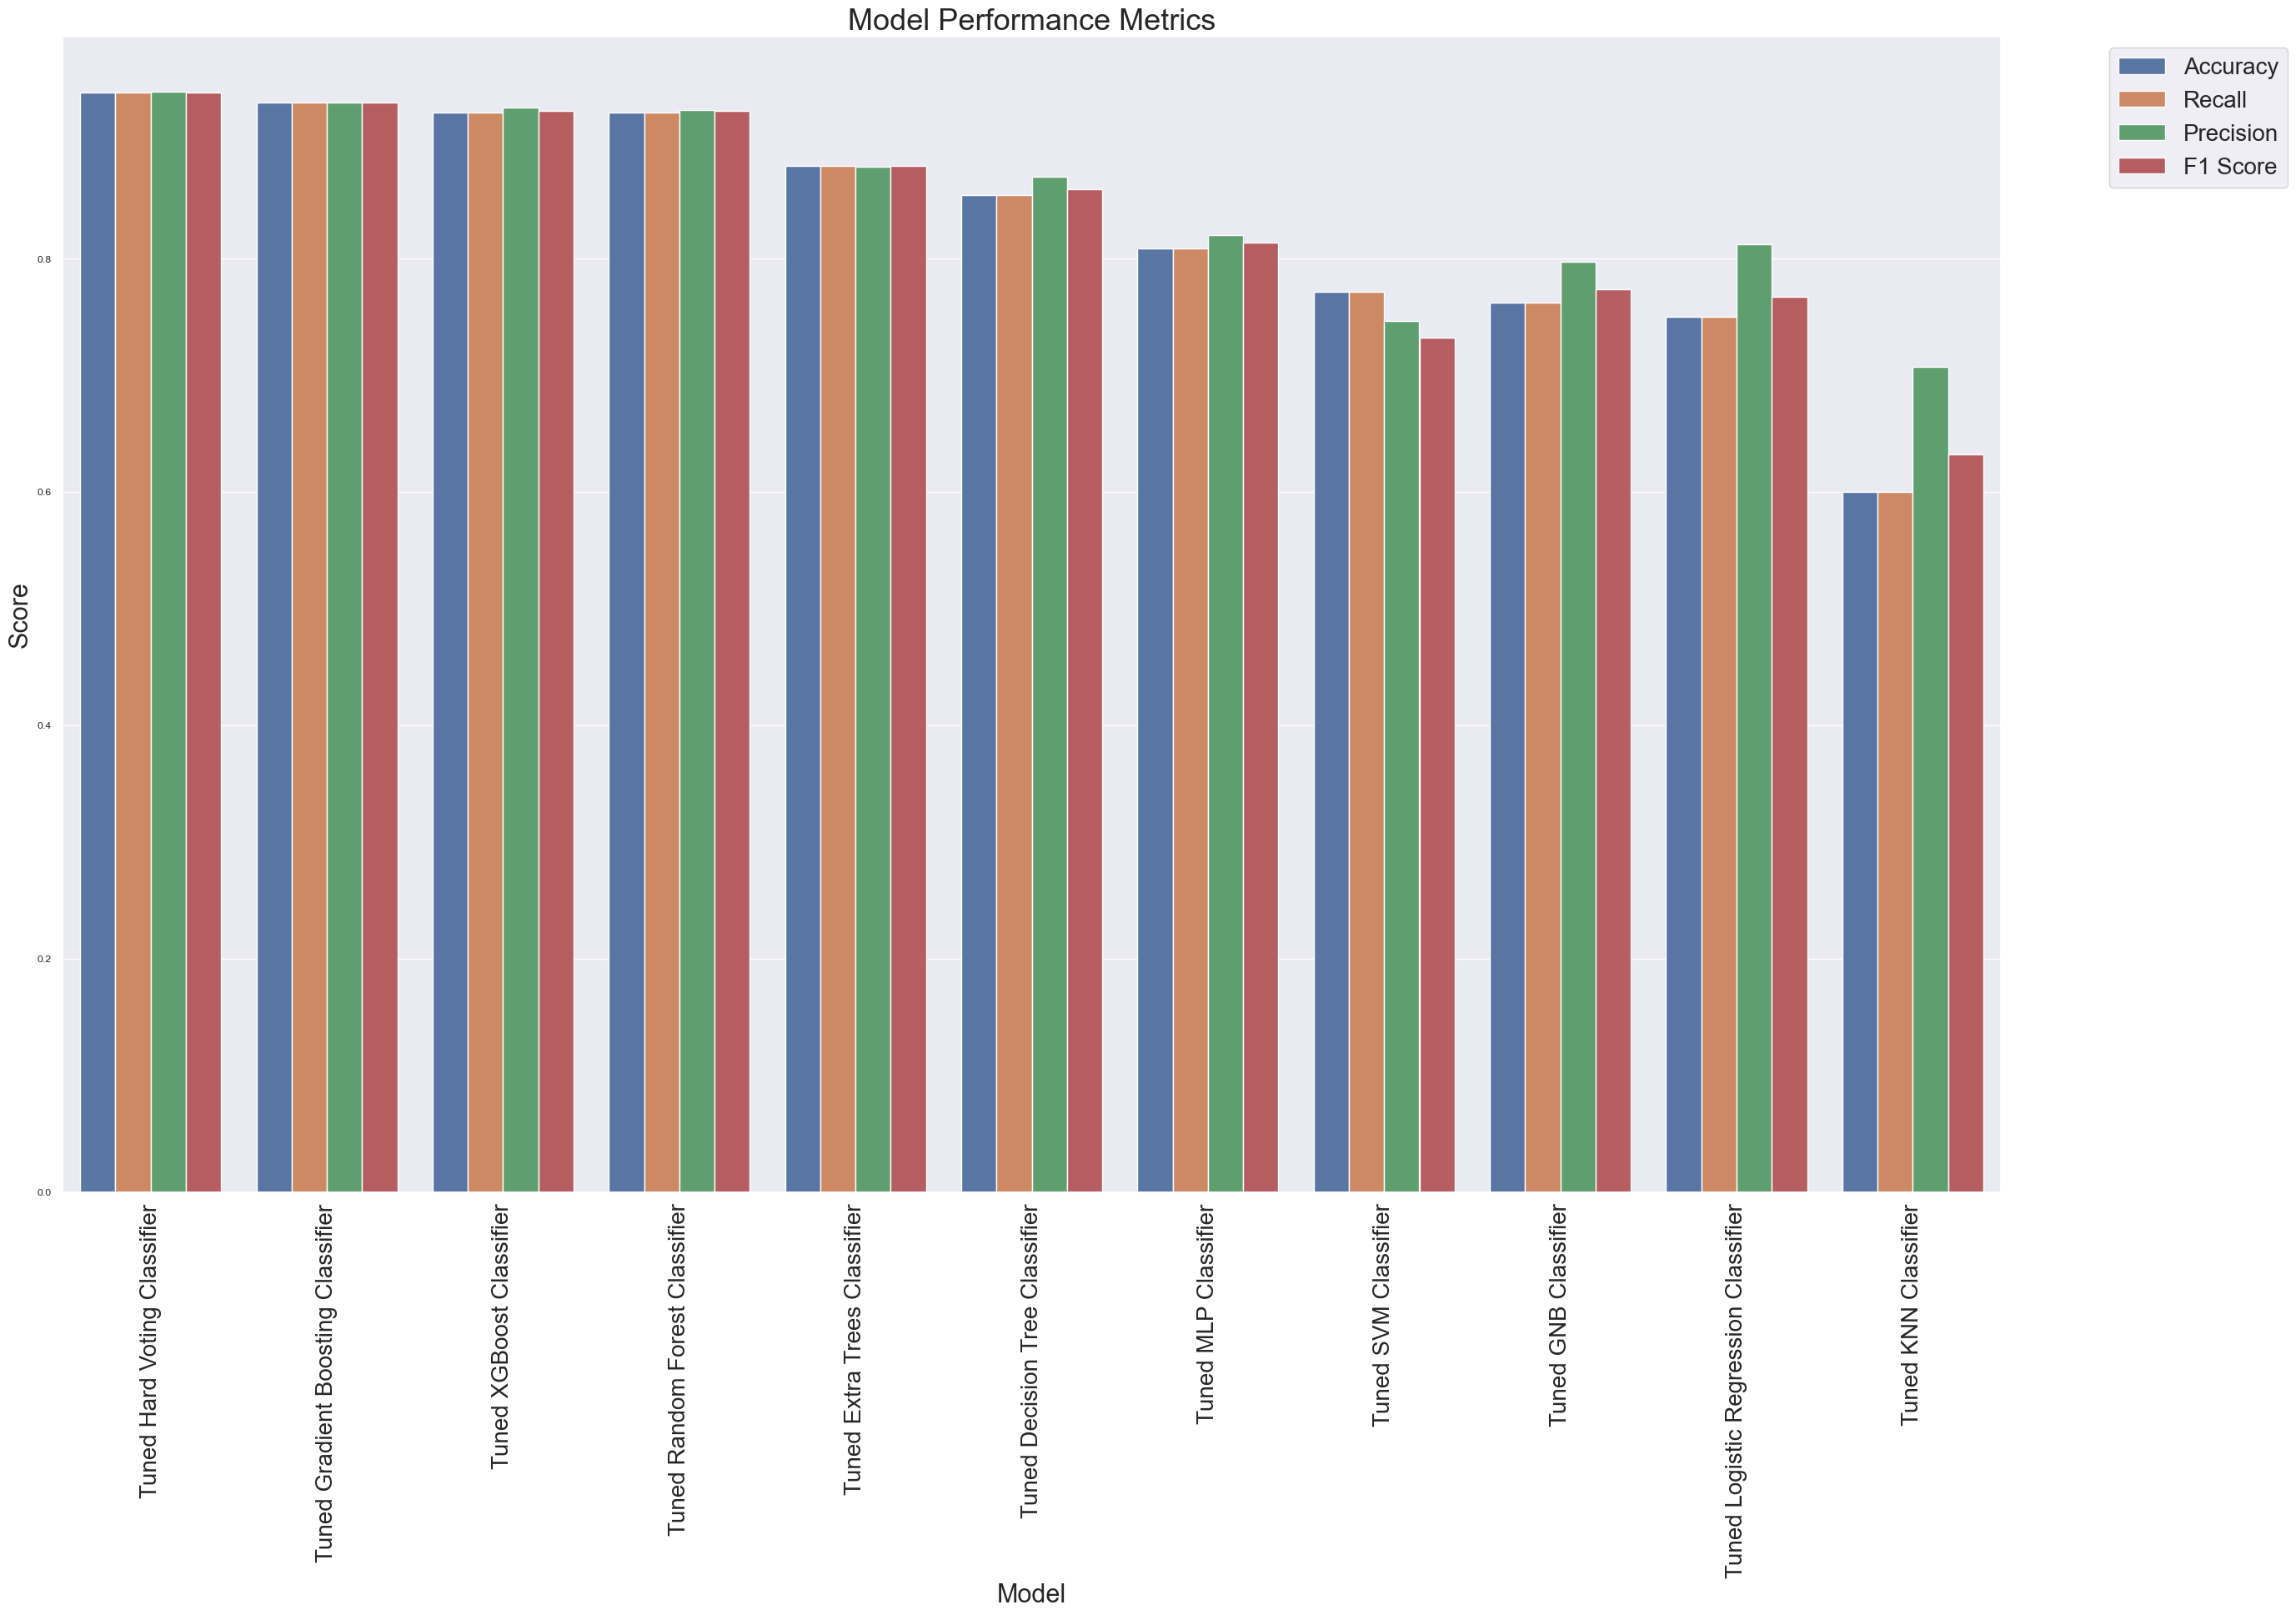

In [132]:
# Plot the Tuned Models' performance metrics i.e  Accuracy, Precision, Recall, F1 Score and ROC_AUC Scores
# Melt the DataFrame to have metrics as a single column
df_melted = pd.melt(combined_tuned_models_df_sorted_reset, id_vars=['Model'], var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(30,18))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Metrics', fontsize=26)
plt.xlabel('Model', fontsize=22)
plt.ylabel('Score', fontsize=22)
plt.xticks(rotation=90, fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), fontsize=20, loc='upper left')
plt.show()

# Model Deployment

In [133]:
# Select and save the best model which in our case is the Tuned Hard Voting Classifier
filename = 'performance_rating_prediction_model.pkl'
pickle.dump(VC_hard_tuned, open(filename, 'wb'))

# Manual Testing of the Deployed Model

In [139]:
age = int(input("Enter Age: "))
gender = str(input("Enter Gender: "))
educationbackground = str(input("Enter EducationBackground:"))
maritalstatus = str(input("Enter MaritalStatus: "))
empdepartment = str(input("Enter EmpDepartment: "))
empjobrole = str(input("Enter EmpJobRole :"))
businesstravelfrequency = str(input("Enter BusinessTravelFrequency :"))
distancefromhome = int(input("Enter DistanceFromHome : "))
empeducationlevel = int(input("Enter EmpEducationLevel : "))
empenvironmentsatisfaction = int(input("Enter EmpEnvironmentSatisfaction : "))
emphourlyrate = int(input("Enter EmpHourlyRate :"))
empjobinvolvement = int(input("Enter EmpJobInvolvement : "))
empjoblevel = int(input("Enter EmpJobLevel :"))
empjobsatisfaction = int(input("Enter EmpJobSatisfaction : "))
numcompaniesworked = int(input("Enter NumCompaniesWorked : "))
overtime = str(input("Enter OverTime :"))
emplastsalaryhikepercent = int(input("Enter EmpLastSalaryHikePercent : "))
emprelationshipsatisfaction = int(input("Enter EmpRelationshipSatisfaction : "))
totalworkexperienceinyears = int(input("Enter TotalWorkExperienceInYears : "))
trainingtimeslastyear = int(input("Enter TrainingTimesLastYear : "))
empworklifebalance = int(input("Enter EmpWorkLifeBalance : "))
experienceyearsatthiscompany = int(input("Enter ExperienceYearsAtThisCompany : "))
experienceyearsincurrentrole = int(input("Enter ExperienceYearsInCurrentRole : "))
yearssincelastpromotion = int(input("Enter YearsSinceLastPromotion : "))
yearswithcurrmanager = int(input("Enter YearsWithCurrManager : "))
attrition = str(input("Enter Attrition : "))
  
manual_test_input = {
        'age': [age],
        'gender': [gender],
        'educationbackground': [educationbackground],
        'maritalstatus': [maritalstatus],
        'empdepartment': [empdepartment],
        'empjobrole': [empjobrole],
        'businesstravelfrequency': [businesstravelfrequency],
        'distancefromhome': [distancefromhome],
        'empeducationlevel': [empeducationlevel],
        'empenvironmentsatisfaction': [empenvironmentsatisfaction],
        'emphourlyrate': [emphourlyrate],
        'empjobinvolvement': [empjobinvolvement],
        'empjoblevel': [empjoblevel],
        'empjobsatisfaction': [empjobsatisfaction],
        'numcompaniesworked': [numcompaniesworked],
        'overtime': [overtime],
        'emplastsalaryhikepercent': [emplastsalaryhikepercent],
        'emprelationshipsatisfaction': [emprelationshipsatisfaction],
        'totalworkexperienceinyears': [totalworkexperienceinyears],
        'trainingtimeslastyear': [trainingtimeslastyear],
        'empworklifebalance': [empworklifebalance],
        'experienceyearsatthiscompany': [experienceyearsatthiscompany],
        'experienceyearsincurrentrole': [experienceyearsincurrentrole],
        'yearssincelastpromotion': [yearssincelastpromotion],
        'yearswithcurrmanager': [yearswithcurrmanager],
        'attrition': [attrition]
    
    }


df_manual_test = pd.DataFrame(manual_test_input)


Enter Age:  26
Enter Gender:  Male
Enter EducationBackground: Medical
Enter MaritalStatus:  Divorced
Enter EmpDepartment:  Research & Development
Enter EmpJobRole : Manager R&D
Enter BusinessTravelFrequency : Travel_Rarely
Enter DistanceFromHome :  21
Enter EmpEducationLevel :  3
Enter EmpEnvironmentSatisfaction :  1
Enter EmpHourlyRate : 37
Enter EmpJobInvolvement :  3
Enter EmpJobLevel : 1
Enter EmpJobSatisfaction :  3
Enter NumCompaniesWorked :  1
Enter OverTime : No
Enter EmpLastSalaryHikePercent :  20
Enter EmpRelationshipSatisfaction :  3
Enter TotalWorkExperienceInYears :  1
Enter TrainingTimesLastYear :  0
Enter EmpWorkLifeBalance :  2
Enter ExperienceYearsAtThisCompany :  1
Enter ExperienceYearsInCurrentRole :  1
Enter YearsSinceLastPromotion :  0
Enter YearsWithCurrManager :  0
Enter Attrition :  Yes


In [140]:
numerical_cols= df_manual_test._get_numeric_data().columns
cols= df_manual_test.columns
categorical_cols=list(set(cols)-set(numerical_cols))

In [141]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical values
for col in categorical_cols:
    df_manual_test[col] = label_encoder.fit_transform(df_manual_test[col])

In [142]:
# Load the Saved Model
performance_rating_predictor = pickle.load(open("performance_rating_prediction_model.pkl", 'rb'))

In [143]:
# Make a prediction using the model
predicted_performance_rating = performance_rating_predictor.predict(df_manual_test)

# Output the prediction
print(f"The predicted performance rating is: {predicted_performance_rating[0]}")

The predicted performance rating is: 4


__Display the Employee Performance Rating Predictor deployed using Streamlit__

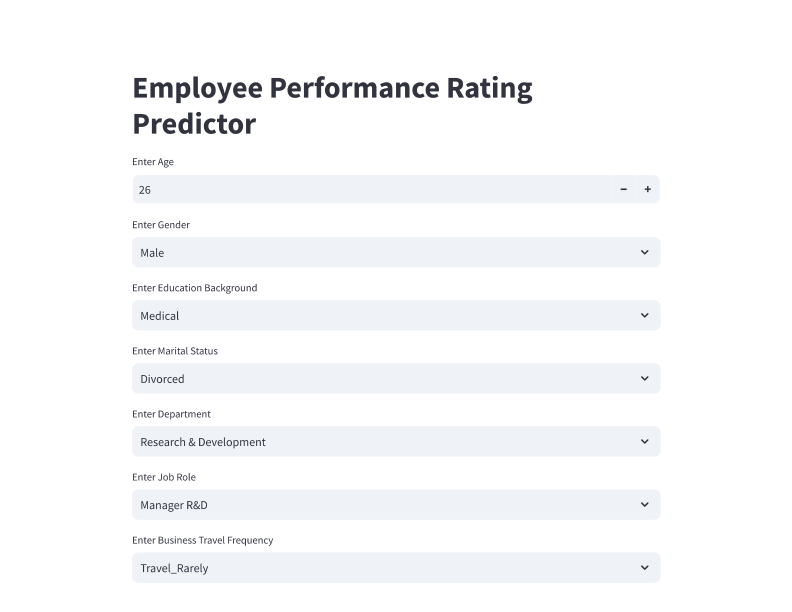

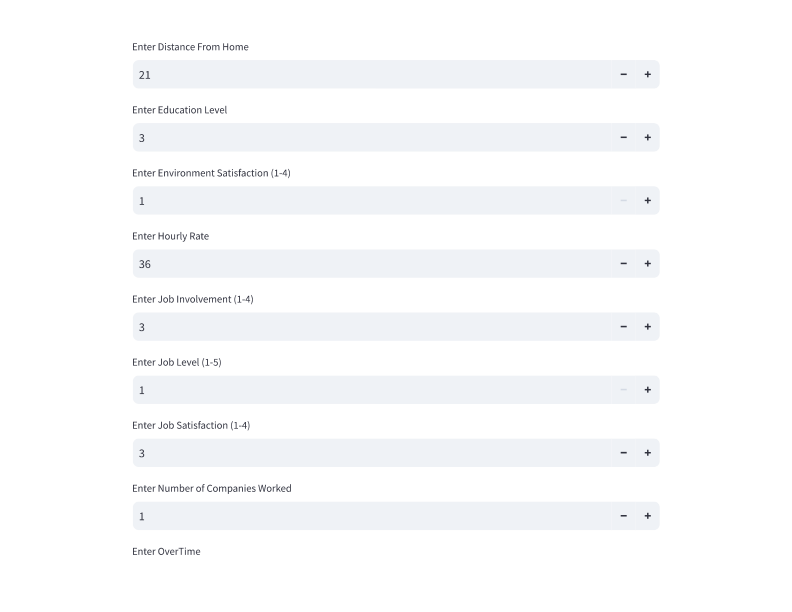

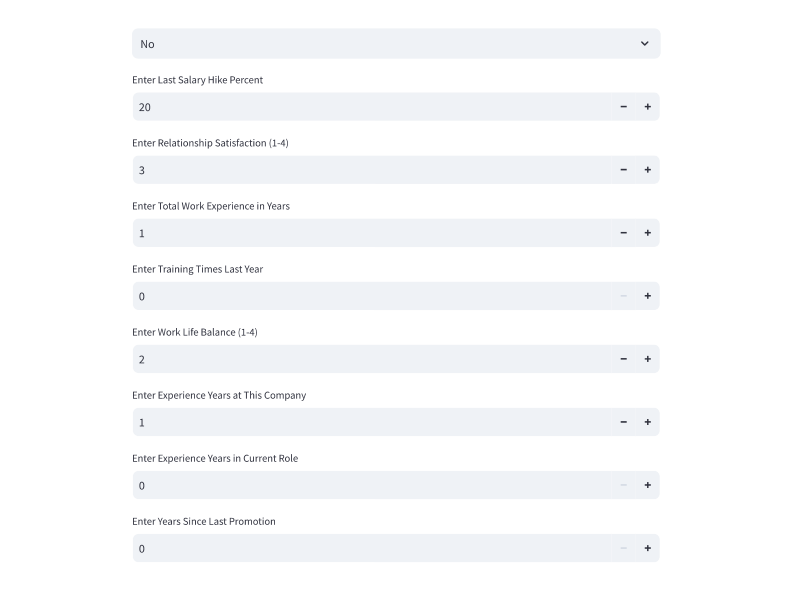

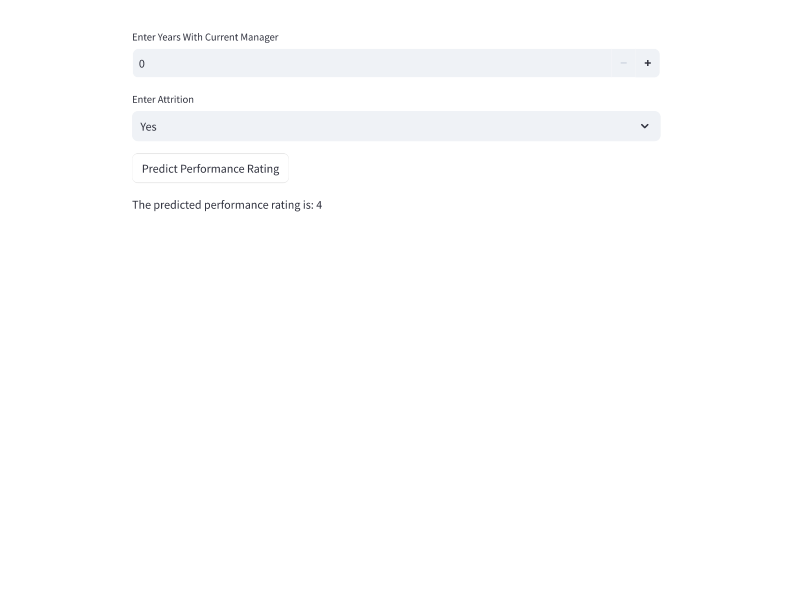

In [153]:
import fitz  # PyMuPDF
from IPython.display import Image

# Open the PDF file
pdf_document = "PerformanceRatingPredictionApp.pdf"
doc = fitz.open(pdf_document)

# Convert each page to an image and display it
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    pix = page.get_pixmap()
    img_data = pix.tobytes("png")
    display(Image(data=img_data))


In [154]:
from IPython.display import IFrame

# Display the PDF file using an iframe
IFrame(src="PerformanceRatingPredictionApp.pdf", width="100%", height="600px")
